# Линейные модели в машинном обучении

**Описание проекта:**

IT-компания, специализирующаяся на машинном обучении, получила запрос от фермера из молочного хозяйства. Он хочет расширить стадо и тщательно отобрать коров для покупки. Фермер требует, чтобы каждая корова давала минимум 6000 кг молока в год и производила вкусное молоко по его строгим критериям.

**Задача** - разработать две прогнозные модели:
1. Прогнозирование годового удоя коровы.
2. Оценка вероятности получения вкусного молока.

**Цель** — с помощью модели нужно отобрать коров по двум критериям:
1. средний удой за год — не менее 6000 килограммов;
2. молоко должно быть вкусным.

В проекте мы будем работать с тремя датасетами:

1. ferma_main
2. ferma_dad
3. cow_buy


**Ход проекта:**

1. Обзор данных
2. Предобработка данных
3. Исследовательский анализ данных
4. Корреляционный анализ
5. Задача регрессии
6. Задача классификации
7. Итоговые выводы

## 1. Загрузка данных

In [1]:
!pip install -U scikit-learn -q

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error 
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score 
 
from scipy.stats import norm

! pip install phik -q
from phik import phik_matrix

In [3]:
pd.set_option('display.max_columns', None) #установим максимальное количество колонок для отображения

In [5]:
#список датафреймов с названиями
dataframes = {
    'ferma_main_df': ferma_main_df,
    'ferma_dad_df': ferma_dad_df,
    'cow_buy_df': cow_buy_df
}

for name, df in dataframes.items():
    print(f"{name}")
    display(df.head(5))
    print(f"Информация о {name}:")
    df.info()
    print()  

ferma_main_df


,id,"Удой, кг",ЭКЕ (Энергетическая кормовая единица),"Сырой протеин, г",СПО (Сахаро-протеиновое соотношение),Порода,Тип пастбища,порода папы_быка,"Жирность,%","Белок,%",Вкус молока,Возраст
0,1,5863,14.2,1743,0.890,Вис Бик Айдиал,Равнинное,Айдиал,3.58,3.076,вкусно,более_2_лет
1,2,5529,12.8,2138,0.890,Вис Бик Айдиал,Равнинные,Соверин,3.54,3.079,вкусно,менее_2_лет
2,3,5810,14.0,1854,0.885,РефлешнСоверинг,Холмистое,Соверин,3.59,3.074,не вкусно,более_2_лет
3,4,5895,12.4,2012,0.885,РефлешнСоверинг,Холмистое,Айдиал,3.40,3.075,не вкусно,более_2_лет
4,5,5302,12.8,1675,0.885,Вис Бик Айдиал,Равнинные,Соверин,3.73,3.073,вкусно,менее_2_лет


Информация о ferma_main_df:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 634 entries, 0 to 633
Data columns (total 12 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   id                                     634 non-null    int64  
 1   Удой, кг                               634 non-null    int64  
 2   ЭКЕ (Энергетическая кормовая единица)  634 non-null    float64
 3   Сырой протеин, г                       634 non-null    int64  
 4   СПО (Сахаро-протеиновое соотношение)   634 non-null    float64
 5   Порода                                 634 non-null    object 
 6   Тип пастбища                           634 non-null    object 
 7   порода папы_быка                       634 non-null    object 
 8   Жирность,%                             634 non-null    float64
 9   Белок,%                                634 non-null    float64
 10  Вкус молока                            634 non

,id,Имя Папы
0,1,Буйный
1,2,Соловчик
2,3,Барин
3,4,Буйный
4,5,Барин


Информация о ferma_dad_df:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 629 entries, 0 to 628
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        629 non-null    int64 
 1   Имя Папы  629 non-null    object
dtypes: int64(1), object(1)
memory usage: 10.0+ KB

cow_buy_df


,Порода,Тип пастбища,порода папы_быка,Имя_папы,"Текущая_жирность,%","Текущий_уровень_белок,%",Возраст
0,Вис Бик Айдиал,холмистое,Айдиал,Геркулес,3.58,3.076,более_2_лет
1,Вис Бик Айдиал,равнинное,Соверин,Буйный,3.54,3.081,менее_2_лет
2,РефлешнСоверинг,равнинное,Соверин,Барин,3.59,3.074,более_2_лет
3,РефлешнСоверинг,холмистое,Айдиал,Буйный,3.40,3.061,более_2_лет
4,РефлешнСоверинг,равнинное,Айдиал,Буйный,3.64,3.074,более_2_лет


Информация о cow_buy_df:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Порода                   20 non-null     object 
 1   Тип пастбища             20 non-null     object 
 2   порода папы_быка         20 non-null     object 
 3   Имя_папы                 20 non-null     object 
 4   Текущая_жирность,%       20 non-null     float64
 5   Текущий_уровень_белок,%  20 non-null     float64
 6   Возраст                  20 non-null     object 
dtypes: float64(2), object(5)
memory usage: 1.2+ KB



Исходный датафрейм **ferma_main_df** содержит 634 строки и 12 столбцов. Пропусков в столбцах нет.\
Не корректный тип данных в столбцах:
- ЭКЕ, 
- СПО,
- Жирность,
- Белок.
В этих столбцах в исходном датафрейме тип данных - obect, а надо float.
Названия колонок не соответствуют хорошему стилю - содержат заглавные буквы и пробелы. Также можно отметить, что названия колонок приведены на русском языке.

Исходный датафрейм **ferma_dad_df** содержит 629 строк и 2 колонки. Пропусков в столбцах нет.\
Тип данных в столбцах корректный.\
Названия колонок не соответсвуют хорошему стилю - аналогично датафрейму ferma_main_df.

Исходный датафрейм **cow_buy_df** содержит 20 строки и 7 колонок. Пропусков в столбцах нет.
Не корректный тип данных в столбцах:
- Текущая_жирность,    
- Текущий_уровень_белок.
В этих столбцах в исходном датафрейме тип данных - object, а надо float.

### Вывод

Предварительно можно утверждать, что данных достаточно для дальнейшего анализа. Но чтобы двигаться дальше, нужно установить корректный тип данных для некоторых столбцов, а названия колонок преобразовать в соответствии с хорошим стилем.

## 2. Предобработка данных

### 2.1 Замена названий столбцов 

Преобразуем названия столбцов в соответствии с правилами хорошего стиля:
- приведем названия столбцов к нижнему регистру,
- заменим пробелы и запятые на нижнее подчеркивание,
- в названих столбцов могут встречаться двойные пробелы, после преобразования на предыдущем шаге они будут заменены на двойное нижнее подчеркивание. Заменим двойное нижнее подчеркивание на одинарное.

Названия столбцов приведены на русском языке. Мы не будем заменять их на английские названия, чтобы не усложнять понимание спицифических терминов.

In [6]:
def clean_column_names(df):
    df.columns = (df.columns
                   .str.lower()
                   .str.replace(r'[ ,]', '_', regex=True)  # Замена пробелов и запятых на _
                   .str.replace(r'__+', '_', regex=True)   # Удаление двойных _
                  )
    return df

In [7]:
ferma_main_df = clean_column_names(ferma_main_df)

In [8]:
ferma_dad_df=clean_column_names(ferma_dad_df)

In [9]:
cow_buy_df=clean_column_names(cow_buy_df)

In [10]:
for name, df in dataframes.items():
    print(df.columns)

Index(['id', 'удой_кг', 'эке_(энергетическая_кормовая_единица)',
       'сырой_протеин_г', 'спо_(сахаро-протеиновое_соотношение)', 'порода',
       'тип_пастбища', 'порода_папы_быка', 'жирность_%', 'белок_%',
       'вкус_молока', 'возраст'],
      dtype='object')
Index(['id', 'имя_папы'], dtype='object')
Index(['порода', 'тип_пастбища', 'порода_папы_быка', 'имя_папы',
       'текущая_жирность_%', 'текущий_уровень_белок_%', 'возраст'],
      dtype='object')


Сократим названия колонок в датафреймах, чтобы сделать их более удобными для работы.

In [11]:
def replace_column_names(df, replacements):
    df.columns = [replacements.get(col, col) for col in df.columns]
    return df

# Словарь для замены длинных названий колонок на сокращенные
column_replacements = {
    'удой_кг': 'удой',
    'эке_(энергетическая_кормовая_единица)': 'эке',
    'сырой_протеин_г': 'протеин',
    'спо_(сахаро-протеиновое_соотношение)': 'спо',
    'жирность_%': 'жирность',
    'белок_%': 'белок',
    'текущая_жирность_%': 'жирность',
    'текущий_уровень_белок_%': 'белок',
    'порода_папы_быка': 'порода_папы',
}

In [12]:
ferma_main_df = replace_column_names(ferma_main_df, column_replacements)

In [13]:
ferma_dad_df = replace_column_names(ferma_dad_df, column_replacements)

In [14]:
cow_buy_df = replace_column_names(cow_buy_df, column_replacements)

In [15]:
for name, df in dataframes.items():
    print(df.columns)

Index(['id', 'удой', 'эке', 'протеин', 'спо', 'порода', 'тип_пастбища',
       'порода_папы', 'жирность', 'белок', 'вкус_молока', 'возраст'],
      dtype='object')
Index(['id', 'имя_папы'], dtype='object')
Index(['порода', 'тип_пастбища', 'порода_папы', 'имя_папы', 'жирность',
       'белок', 'возраст'],
      dtype='object')


Замена прошла успешно.

### 2.2 Обработка пропусков и дубликатов

Зафиксируем исходное количество данных в каждом дата фрейме в переменной, чтобы в дальнейшем оценить какой процент данных будет исключен после предобработки. Мы можем провести адекватный анализ, если после всех преобразований у нас осталось не менее 90% значений исходного датафрейма.

In [16]:
def create_shape_variable(dataframes, shape_dict):
    for name, df in dataframes.items():
        shape_dict[f"shape_{name}"] = len(df)

# Создаём словарь для хранения переменных
shape_dict = {}

# Пример использования
create_shape_variable(dataframes, shape_dict)

# Вывод значений из словаря
for var_name, shape in shape_dict.items():
    print(f"{var_name} = {shape}")


shape_ferma_main_df = 634
shape_ferma_dad_df = 629
shape_cow_buy_df = 20


 На этапе загрузки данных мы установили, что в исходных датафреймах нет пропущенных значений.\
 Проверим датафрейм на наличие строк-дубликатов - выведем их количество и долю в каждом датафрейме.

In [17]:
 for name, df in dataframes.items():
    duplicates_count = df.duplicated().sum()
    if f"shape_{name}" in shape_dict:
        percentage = duplicates_count / shape_dict[f"shape_{name}"]
    else:
        percentage = float('0')  
    print(f"Количество строк-дубликатов в {name}: {duplicates_count} ({percentage:.2%})")

Количество строк-дубликатов в ferma_main_df: 5 (0.79%)
Количество строк-дубликатов в ferma_dad_df: 0 (0.00%)
Количество строк-дубликатов в cow_buy_df: 4 (20.00%)


В датафрейме ferma_main_df обнаружено 5 строк-дубликатов, которые составляю 0.79% всех данных.\
В связи с тем, что в датафрейме каждое значение имеет свой уникальный идентификатор (у каждой коровы свой id), то дублирующиеся строки нужно удалить.\
Дублирование строк может быть связано с ошибками при сборе информации, поэтому необходимо сообщить о них поставщику данных.

In [18]:
ferma_main_df = ferma_main_df.drop_duplicates(keep='first').reset_index(drop=True)

In [19]:
ferma_main_df.duplicated().sum()

0

Удаление прошло успешно.

В датафрейме cow_buy_df обнаружены 4 строки-дубликата, которые составляют 20% всех данных.\
В этом датафрейме содержатся данные о коровах «ЭкоФермы», которых фермер хочет изучить перед покупкой.\
Объекты датафрейма не имеют уникальных идентификаторов, поэтому мы не можем однозначно утверждать, что дублирующиеся строки - это одни те же объекты.\
Так как у нас нет возможности обратиться к поставщику данных, а также учитывая большой процент дублирующихся строк, то удалять такие значения не является целесообразным.\
Можем предположить, что есть коровы, у которых совпали все признаки.

В исходных датафреймах есть столбцы с категориальнми данными: порода, тип пастбища, порода папы, вкус молока и возраст. Проверим уникальные значения в каждом из этих столбцов.

In [20]:
def get_unique_categories(df):
    # Выбираем только категориальные столбцы
    categorical_columns = [col for col in df.columns if df[col].dtype == 'object']
    unique_values = {col: df[col].unique().tolist() for col in categorical_columns}
    return unique_values

In [21]:
get_unique_categories(ferma_main_df)

{'порода': ['Вис Бик Айдиал', 'РефлешнСоверинг'],
 'тип_пастбища': ['Равнинное', 'Равнинные', 'Холмистое'],
 'порода_папы': ['Айдиал', 'Соверин', 'Айдиалл'],
 'вкус_молока': ['вкусно', 'не вкусно'],
 'возраст': ['более_2_лет', 'менее_2_лет']}

In [22]:
get_unique_categories(cow_buy_df)

{'порода': ['Вис Бик Айдиал', 'РефлешнСоверинг'],
 'тип_пастбища': ['холмистое', 'равнинное'],
 'порода_папы': ['Айдиал', 'Соверин'],
 'имя_папы': ['Геркулес', 'Буйный', 'Барин', 'Соловчик'],
 'возраст': ['более_2_лет', 'менее_2_лет']}

In [23]:
get_unique_categories(ferma_dad_df)

{'имя_папы': ['Буйный', 'Соловчик', 'Барин', 'Геркулес']}

Приведем значения к одному виду.

In [24]:
ferma_main_df.loc[:, 'порода'] = ferma_main_df['порода'].replace({
    'Вис Бик Айдиал': 'Айдиал',
    'РефлешнСоверинг': 'Соверин'  
})

In [25]:
cow_buy_df.loc[:, 'порода'] = cow_buy_df['порода'].replace({
    'Вис Бик Айдиал': 'Айдиал',
    'РефлешнСоверинг': 'Соверин'  
})

In [26]:
ferma_main_df.loc[:, 'тип_пастбища'] = ferma_main_df['тип_пастбища'].str.lower().replace({
    'равнинные': 'равнинное',
    'Холмистое': 'холмистое'  
})

In [27]:
ferma_main_df.loc[:, 'порода_папы'] = ferma_main_df['порода_папы'].replace('Айдиалл', 'Айдиал')

In [28]:
ferma_main_df.loc[:, 'вкус_молока'] = ferma_main_df['вкус_молока'].replace('не вкусно', 'не_вкусно')

In [29]:
get_unique_categories(ferma_main_df)

{'порода': ['Айдиал', 'Соверин'],
 'тип_пастбища': ['равнинное', 'холмистое'],
 'порода_папы': ['Айдиал', 'Соверин'],
 'вкус_молока': ['вкусно', 'не_вкусно'],
 'возраст': ['более_2_лет', 'менее_2_лет']}

In [30]:
get_unique_categories(cow_buy_df)

{'порода': ['Айдиал', 'Соверин'],
 'тип_пастбища': ['холмистое', 'равнинное'],
 'порода_папы': ['Айдиал', 'Соверин'],
 'имя_папы': ['Геркулес', 'Буйный', 'Барин', 'Соловчик'],
 'возраст': ['более_2_лет', 'менее_2_лет']}

In [31]:
get_unique_categories(ferma_dad_df)

{'имя_папы': ['Буйный', 'Соловчик', 'Барин', 'Геркулес']}

Замена прошла успешно.

Так как в результате обработки данных мы удалили минимальное количество строк, то проверять остаточный размер датафреймов не имеет смысла - они остались практически без изменений.

### 2.3 Изменение типов данных

На этапе изучения данных мы выявили не корректные типы данных в исходных датафреймах:

**ferma_main_df**:
- ЭКЕ, 
- СПО,
- Жирность,
- Белок.

**cow_buy_df** 
- Текущая_жирность,    
- Текущий_уровень_белок.

В этих столбцах тип данных - object, а надо float, так как он соответсвует непрерывным числовым данным.\
Изменим тип данных на корректный.

In [32]:
print(ferma_main_df.columns)
print(cow_buy_df.columns)

Index(['id', 'удой', 'эке', 'протеин', 'спо', 'порода', 'тип_пастбища',
       'порода_папы', 'жирность', 'белок', 'вкус_молока', 'возраст'],
      dtype='object')
Index(['порода', 'тип_пастбища', 'порода_папы', 'имя_папы', 'жирность',
       'белок', 'возраст'],
      dtype='object')


In [33]:
def change_data_type(df, columns, new_type):
    df[columns] = df[columns].astype(new_type)
    print(df.dtypes)
    return df

In [34]:
ferma_main_df = change_data_type(ferma_main_df, ['эке', 'спо', 'жирность', 'белок', 'удой', 'протеин'], float)
cow_buy_df = change_data_type(cow_buy_df, ['жирность', 'белок'], float)

id                int64
удой            float64
эке             float64
протеин         float64
спо             float64
порода           object
тип_пастбища     object
порода_папы      object
жирность        float64
белок           float64
вкус_молока      object
возраст          object
dtype: object
порода           object
тип_пастбища     object
порода_папы      object
имя_папы         object
жирность        float64
белок           float64
возраст          object
dtype: object


Замена прошла успешно.

### Вывод

На этапе предобработки данных мы:
1. Привели названия столбцов в соответсвие с правилами хорошего стиля.
2. Обработали пропуски и дубликаты:
    - в исходных датафреймах пропусков не обнаружено,
    - в датафрейме ferma_main_df обнаружено 5 строк-дубликатов, которые составляю 0.79% всех данных. Дублирующиеся строки удалили, так как они совпадают по уникальному идентификатору,
    - в датафрейме cow_buy_df обнаружены 4 строки-дубликата, которые составляют 20% всех данных. Объекты не имеют уникальных идентификаторов. Мы предположили, что есть коровы, у которых совпали все признаки, поэтому удалять дубликаты не стали,
    - в датафрейме ferma_dad_df строк-дубликатов не обнаружено,
    - проверили уникальные значения для категориальных признаков каждого датафрейма и устранили неявные дубликаты,
3. Установили корректные типы данных в исходных датафреймах:
    - в датафрейме ferma_main_df в столбцах ЭКЕ, СПО, Жирность, Белок был тип данных - object, заменили на float,
    - в датафрейме cow_buy_df в столцах текущая_жирность, текущий_уровень_белок был тип данных - object, заменили на float.
 
Рекомендации:  
Дублирование строк может быть связано с ошибками при сборе информации, поэтому необходимо сообщить о них поставщику данных.

В результате выполненной предобработки мы подготовили данные для дальнейшего анализа.

## 3. Исследовательский анализ данных

Построим графики для каждого признака Для этого напишем функцию, которая будет строить частотную гистограмму и боксплот для количественных признаков и столбчатую гистограмму для категориальных признаков.

In [35]:
def plot_feature_distribution(df_name, column_name):

    df = globals()[df_name]
    
    if df[column_name].dtype == 'object':
        # Для категориальных признаков
        plt.figure(figsize=(8, 6))
        df[column_name].value_counts().plot(kind='bar')
        plt.title(f'Распределение по признаку: {column_name}', pad=20)
        plt.xlabel(column_name)
        plt.ylabel('Количество')
        plt.grid(True, alpha=0.3)
        plt.xticks(rotation=0, ha='center')
        
    else:
        # Для количественных признаков
        plt.figure(figsize=(8, 10))
        
        # Гистограмма
        plt.subplot(2, 1, 1)
        plt.hist(df[column_name], bins=10, color='skyblue', edgecolor='black')
        plt.title(f'Гистограмма распределения по признаку: {column_name}', pad=15)
        plt.xlabel(column_name)
        plt.ylabel('Частота')
        plt.grid(True, alpha=0.3)

        # Boxplot
        plt.subplot(2, 1, 2) 
        plt.boxplot(df[column_name], vert=False, patch_artist=True,
                   boxprops=dict(facecolor='lightgreen'))
        plt.title(f'Boxplot для признака: {column_name}', pad=15)
        plt.xlabel(column_name)
        plt.yticks([])  # Убираем подпись оси OY
        plt.grid(True, alpha=0.3)
    
    plt.tight_layout()
    plt.show()

### 3.1 Датафрейм ferma_main_df

#### 3.1.1 удой

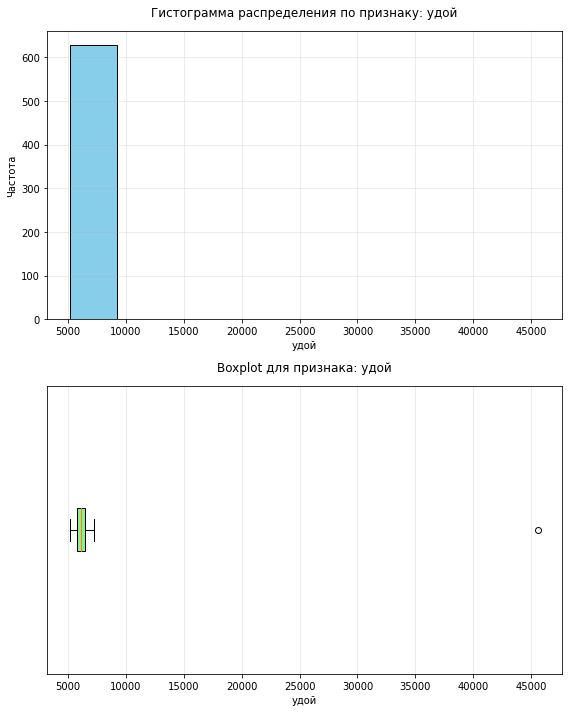

In [36]:
plot_feature_distribution('ferma_main_df', 'удой') 

На гистограмме признака "удой" все значения собрались в одном столбце, а боксплот показывает одну точку с экстремально большим значением - это выброс. Выведем описательную статистику, чтобы получить числовые значения квартилей.

In [37]:
ferma_main_df['удой'].describe()

count      629.000000
mean      6188.750397
std       1644.795489
min       5204.000000
25%       5751.000000
50%       6133.000000
75%       6501.000000
max      45616.000000
Name: удой, dtype: float64

75% данных лежат в пределах 6501. Максимальное значение 45616 выглядит неправдоподобным. Выведем строку с максимальным значением.

In [38]:
ferma_main_df.query('удой > 10000')

,id,удой,эке,протеин,спо,порода,тип_пастбища,порода_папы,жирность,белок,вкус_молока,возраст
16,17,45616.0,11.5,1675.0,0.93,Айдиал,холмистое,Айдиал,3.22,3.076,вкусно,более_2_лет


Возможно произошла ошибка на этапе сбора информации - надо уточнить у поставщика данных. Так как мы не можем предположить логичной замены, удалим строку с аномальным значением параметра удой.

In [39]:
ferma_main_df = ferma_main_df.query('not (удой > 10000)')

Построим графики по параметру удой после удаления выбросов.

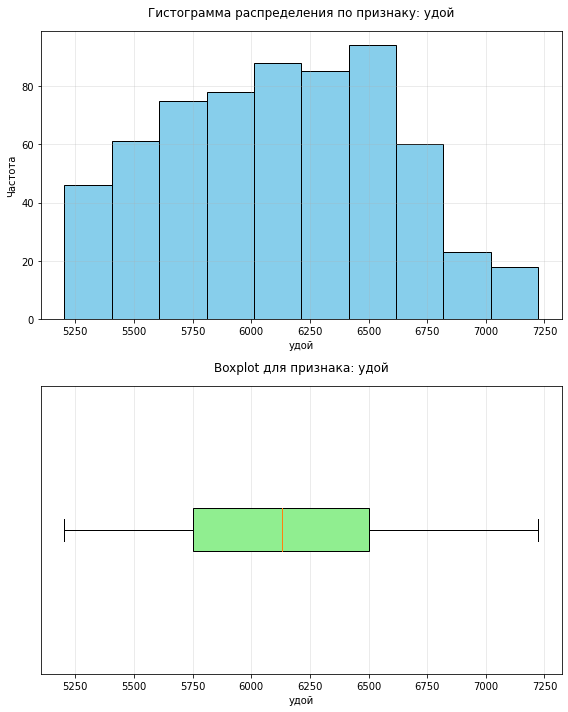

In [40]:
plot_feature_distribution('ferma_main_df', 'удой') 

Гистограмма  изменила вид, однако она по-прежнему не похожа на нормальное распределение, но на боксплоте нет выбросов. Выведем знаения описательной статистики.

In [41]:
ferma_main_df['удой'].describe()

count     628.000000
mean     6125.968153
std       475.857053
min      5204.000000
25%      5749.750000
50%      6132.500000
75%      6501.000000
max      7222.000000
Name: удой, dtype: float64

Мы видим, что среднее значение уменьшилось и теперь практически совпадает с медианой. После преобразования по параметру "удой" выросов и аномалий в данных не обнаружено.

In [42]:
ferma_main_df.columns

Index(['id', 'удой', 'эке', 'протеин', 'спо', 'порода', 'тип_пастбища',
       'порода_папы', 'жирность', 'белок', 'вкус_молока', 'возраст'],
      dtype='object')

#### 3.1.2 эке

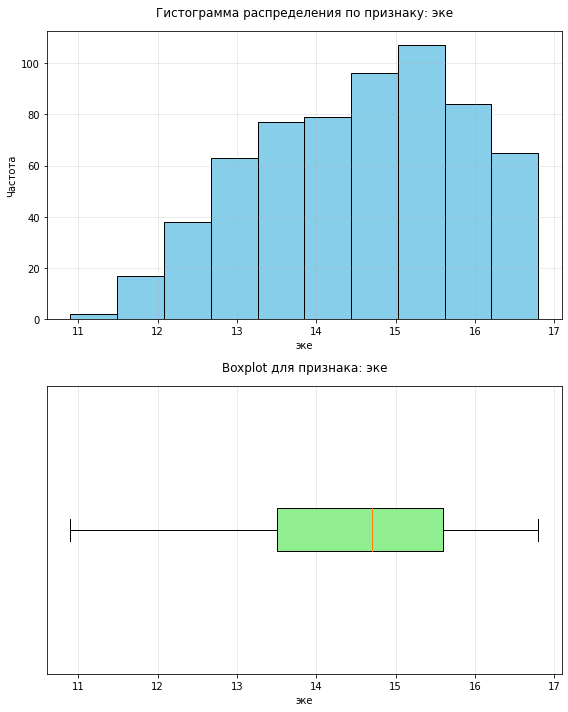

In [43]:
plot_feature_distribution('ferma_main_df', 'эке') 

Гистограмма признака "эке" не похожа на нормальное распределение. Однако на боксплоте выбросов нет.

In [44]:
ferma_main_df['эке'].describe()

count    628.000000
mean      14.548726
std        1.301777
min       10.900000
25%       13.500000
50%       14.700000
75%       15.600000
max       16.800000
Name: эке, dtype: float64

Описательная статистика показывает, что среднее значение и медиана практически совпадают.\
Можем сделать вывод, что по параметру "эке" выбросов и аномалий в данных не обнаружено.

In [45]:
 ferma_main_df.columns

Index(['id', 'удой', 'эке', 'протеин', 'спо', 'порода', 'тип_пастбища',
       'порода_папы', 'жирность', 'белок', 'вкус_молока', 'возраст'],
      dtype='object')

#### 3.1.3 протеин

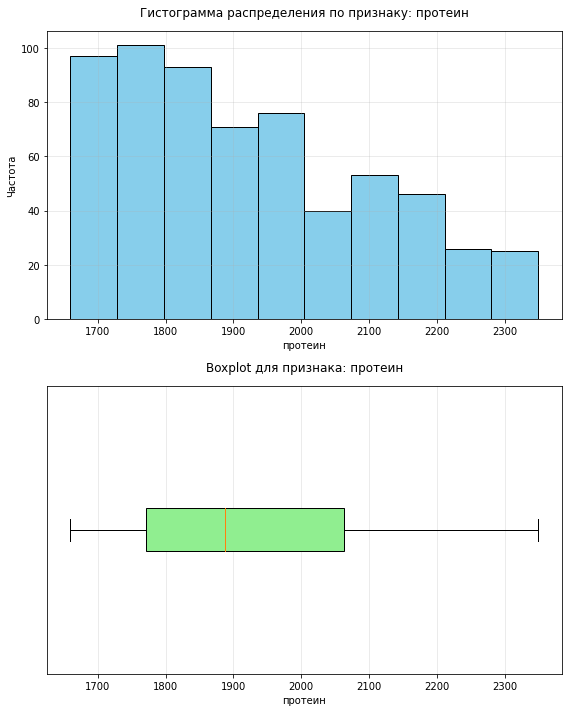

In [46]:
plot_feature_distribution('ferma_main_df', 'протеин') 

Гистаграмма параметра "протеин" не похожа на нормальное распределение. Наибольшее количество значений находится в интервале примерно 1650-1850, далее график имеет тендецию к снижению до 2350.\
На боксплоте нет выбросов, однако мы видим, что медиана смещенна вниз - к минимальным значениям.

In [47]:
ferma_main_df['протеин'].describe()

count     628.000000
mean     1923.759554
std       182.832816
min      1660.000000
25%      1771.750000
50%      1888.000000
75%      2062.250000
max      2349.000000
Name: протеин, dtype: float64

Среднее значение составляет 1923,76, а медиана 1888. Аномалий и выбросов в данных не выявленно.

In [48]:
ferma_main_df.columns

Index(['id', 'удой', 'эке', 'протеин', 'спо', 'порода', 'тип_пастбища',
       'порода_папы', 'жирность', 'белок', 'вкус_молока', 'возраст'],
      dtype='object')

#### 3.1.4 спо

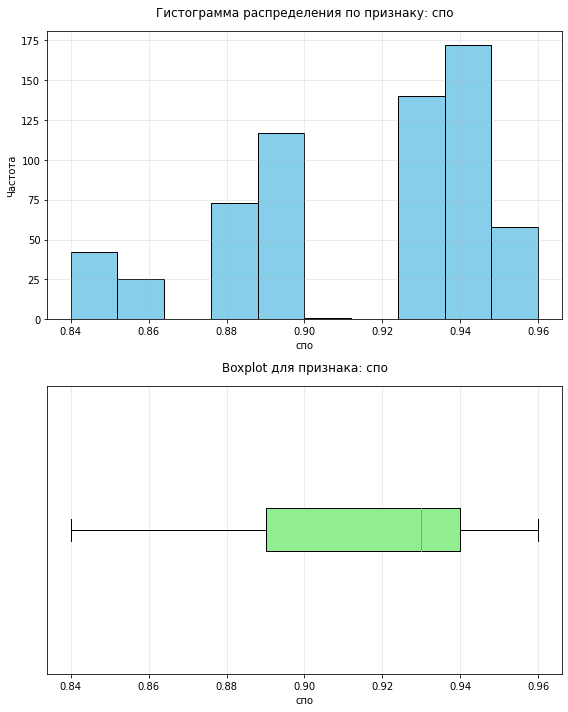

In [49]:
plot_feature_distribution('ferma_main_df', 'спо') 

Гистограмма распределения параметра "СПО" имеет 3 выраженных интервала: 0,84-0,86, 0,88-0,90 и 0,93-0,96. Самый многочисленный - 0,93-0,96. Боксплот показывает, что медиана стремится к максимальным значениям, однако выбросов нет.\
Согласно информации из открытых источников: в норме отношение сахара к переваримому протеину в рационе (СПО) составляет 0,6-1,5:1 (оптимальное 0,8-1,2 : 1). Таким образом, исходные данные соответсвуют оптимальным по параметру СПО.\
Отметим, что этот  признак - кандидат на перевод в категориальную шкалу (из 2х или из 3х элементов - что надо проверять качеством модели итоговой

In [50]:
ferma_main_df.columns

Index(['id', 'удой', 'эке', 'протеин', 'спо', 'порода', 'тип_пастбища',
       'порода_папы', 'жирность', 'белок', 'вкус_молока', 'возраст'],
      dtype='object')

#### 3.1.5 порода

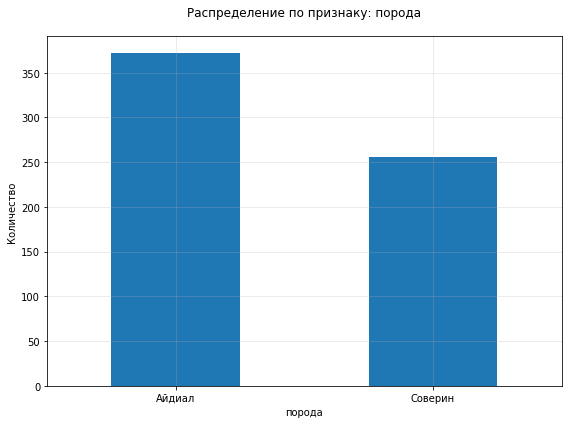

In [51]:
plot_feature_distribution('ferma_main_df', 'порода') 

В ислледуемом датасете данные по параметру "порода" принимают 2 значения: Вис Бик Айдиал (наиболее многочисленная группа, примерно 370 коров) и РефлешнСоверинг (их чуть больше 250).

In [52]:
ferma_main_df.columns

Index(['id', 'удой', 'эке', 'протеин', 'спо', 'порода', 'тип_пастбища',
       'порода_папы', 'жирность', 'белок', 'вкус_молока', 'возраст'],
      dtype='object')

#### 3.1.6 тип пастбища

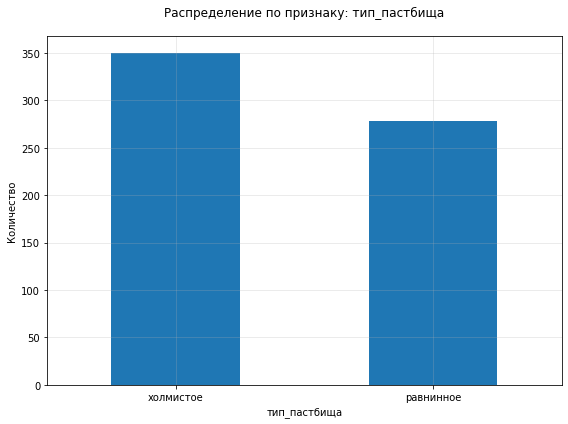

In [53]:
plot_feature_distribution('ferma_main_df', 'тип_пастбища') 

Параметр "тип пастбища" включает 2 группы: холмистое и равнинное. Наибольшая группа - холмистый тип пастбища (около 350 коров), наименьшая группа - равнинный тип пастбища (около 270 коров).

In [54]:
ferma_main_df.columns

Index(['id', 'удой', 'эке', 'протеин', 'спо', 'порода', 'тип_пастбища',
       'порода_папы', 'жирность', 'белок', 'вкус_молока', 'возраст'],
      dtype='object')

#### 3.1.7 порода папы-быка

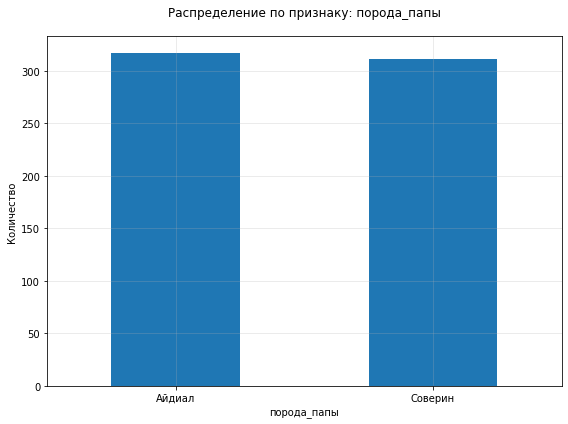

In [55]:
plot_feature_distribution('ferma_main_df', 'порода_папы') 

Признак "порода папы быка" принимает 2 значения, частота встречаемости которых практически одинаковая - Айдиал (около 320) и Соверин (около 310).

In [56]:
ferma_main_df.columns

Index(['id', 'удой', 'эке', 'протеин', 'спо', 'порода', 'тип_пастбища',
       'порода_папы', 'жирность', 'белок', 'вкус_молока', 'возраст'],
      dtype='object')

#### 3.1.8 жирность

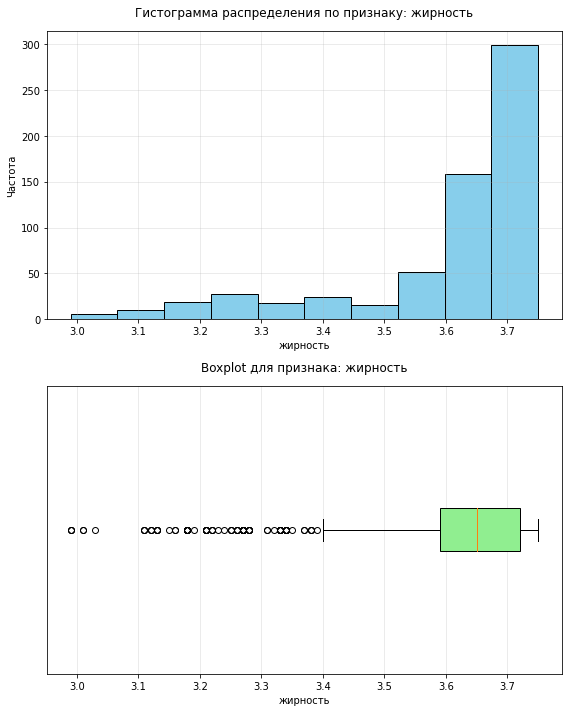

In [57]:
plot_feature_distribution('ferma_main_df', 'жирность') 

Гистограмма параметра "жирность" показывает, что наибольшее количество значений сконцентрированно в интервале 3,6-3,75.\
При этом боксплот определил значения менее 3,4 как выбросы. 

Признак "жирность" тоже кажется потенциально той фичей, которую имело бы смысл перевести в категориальную шкалу: "низкая"-"средняя"-"высокая".

Посмотрим на описательную статистику.

In [58]:
ferma_main_df['жирность'].describe()

count    628.000000
mean       3.604268
std        0.168093
min        2.990000
25%        3.590000
50%        3.650000
75%        3.720000
max        3.750000
Name: жирность, dtype: float64

Выведем строки, где значение параметра жирность менее 3.4

In [59]:
ferma_main_df.query('жирность < 3.4')

,id,удой,эке,протеин,спо,порода,тип_пастбища,порода_папы,жирность,белок,вкус_молока,возраст
5,6,5254.0,12.7,1806.0,0.885,Соверин,холмистое,Соверин,3.13,3.078,вкусно,менее_2_лет
9,10,5339.0,13.4,1791.0,0.895,Айдиал,холмистое,Соверин,3.13,3.075,вкусно,менее_2_лет
10,11,5591.0,13.7,1678.0,0.895,Соверин,холмистое,Айдиал,3.13,3.075,вкусно,менее_2_лет
17,18,5777.0,12.4,1873.0,0.895,Айдиал,холмистое,Айдиал,3.03,3.080,вкусно,более_2_лет
24,25,5372.0,13.2,1703.0,0.895,Айдиал,равнинное,Айдиал,3.31,3.078,не_вкусно,менее_2_лет
...,...,...,...,...,...,...,...,...,...,...,...,...
587,588,5610.0,14.7,1671.0,0.880,Айдиал,равнинное,Айдиал,3.18,3.079,не_вкусно,более_2_лет
589,590,5213.0,12.1,2016.0,0.880,Соверин,равнинное,Соверин,3.19,3.076,не_вкусно,менее_2_лет
591,592,5520.0,11.9,1785.0,0.880,Айдиал,равнинное,Соверин,3.12,3.073,не_вкусно,менее_2_лет
602,603,5594.0,12.3,1742.0,0.880,Айдиал,равнинное,Айдиал,3.11,3.077,вкусно,менее_2_лет


Мы видим, что при жирности менее 3,4 целевой показатель принимает в том числе значение "вкусно". Мы не будем удалять выбросы и оставим все данные для дальнейшего исследования.

In [60]:
ferma_main_df.columns

Index(['id', 'удой', 'эке', 'протеин', 'спо', 'порода', 'тип_пастбища',
       'порода_папы', 'жирность', 'белок', 'вкус_молока', 'возраст'],
      dtype='object')

#### 3.1.9 белок

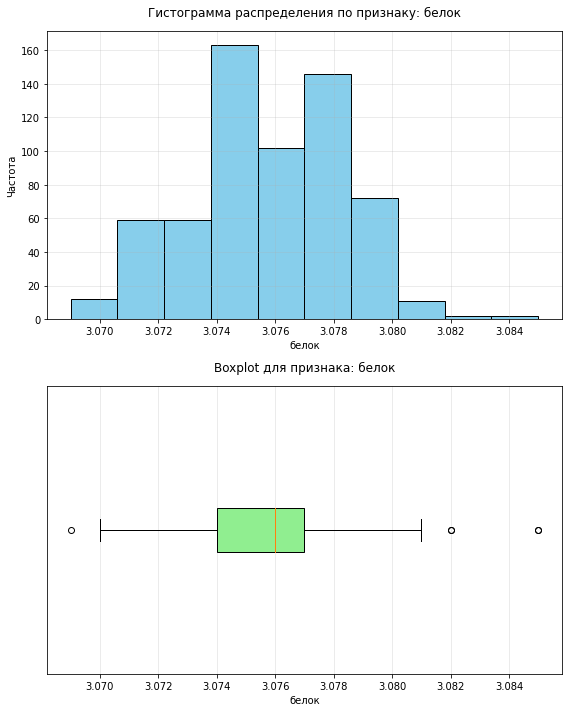

In [61]:
plot_feature_distribution('ferma_main_df', 'белок') 

In [62]:
ferma_main_df['белок'].describe()

count    628.000000
mean       3.075670
std        0.002551
min        3.069000
25%        3.074000
50%        3.076000
75%        3.077000
max        3.085000
Name: белок, dtype: float64

Мы видим, что гистограмма по параметру "белок" имеет два выраженных пика - около 3,074 и 3,078. Боксплот показывает наличие единичных выбросов, медиана смещена в сторону максимального значения.\
Предлагается не удалять выбросы, оставить их для полноты данных.

In [63]:
ferma_main_df.columns

Index(['id', 'удой', 'эке', 'протеин', 'спо', 'порода', 'тип_пастбища',
       'порода_папы', 'жирность', 'белок', 'вкус_молока', 'возраст'],
      dtype='object')

#### 3.1.10 вкус молока

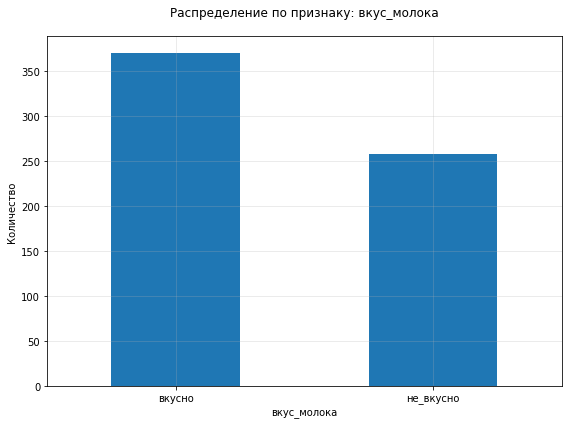

In [64]:
plot_feature_distribution('ferma_main_df', 'вкус_молока') 

Вкус молока принимает 2 значения "вкусно" и "не вкусно". Значение "вкусно" встречается около 370 раз, "не вкусно" чуть более 250.

Мы наблюдаем дисбаланс целевой переменной.
В таких случаях рекомендуется использовать такие метрики как:

* Precision (точность): Показывает, какая доля положительных предсказаний верна.

* Recall (полнота): Показывает, какая доля истинных положительных примеров была уловлена моделью. 

* F1-мера: Сочетание точности и полноты.

* Матрица ошибок (Confusion Matrix): Позволяет увидеть, какие именно ошибки совершает модель, а не просто общую долю правильных предсказаний.

Эти метрики более информативны в контексте задач с дисбалансом классов, поскольку они учитывают различные аспекты работы модели и ее способность корректно предсказывать оба класса.

In [65]:
ferma_main_df.columns

Index(['id', 'удой', 'эке', 'протеин', 'спо', 'порода', 'тип_пастбища',
       'порода_папы', 'жирность', 'белок', 'вкус_молока', 'возраст'],
      dtype='object')

#### 3.1.11 возраст

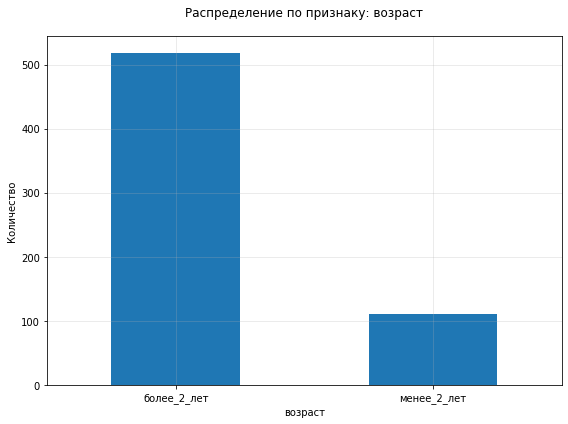

In [66]:
plot_feature_distribution('ferma_main_df', 'возраст') 

В иследуемом датасете коров возрастом более 2 лет около 510, менее 2 лет - значительно меньше - около 110.

### 3.2 Датафрейм ferma_dad_df

In [67]:
ferma_dad_df.columns

Index(['id', 'имя_папы'], dtype='object')

#### 3.2.1 имя папы

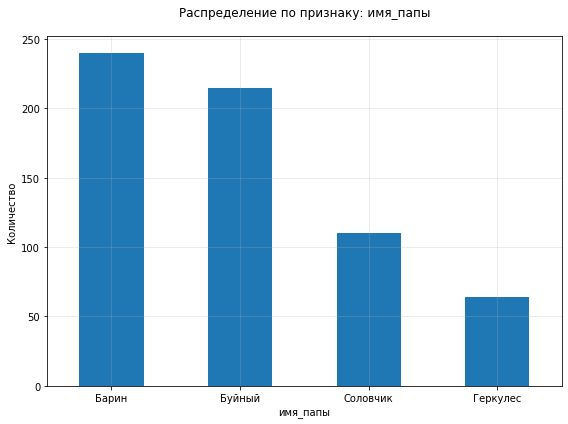

In [68]:
plot_feature_distribution('ferma_dad_df', 'имя_папы') 

Наибольшее потомство у быка Барин - около 240 коров, далее следует Буйный - около 210 коров, далее -  бык Соловчик - 110 коров, и наименьшее количество у быка Геркулес - около 60 коров.

### 3.3 Датафрейм cow_buy_df

In [69]:
cow_buy_df.columns

Index(['порода', 'тип_пастбища', 'порода_папы', 'имя_папы', 'жирность',
       'белок', 'возраст'],
      dtype='object')

#### 3.3.1 порода

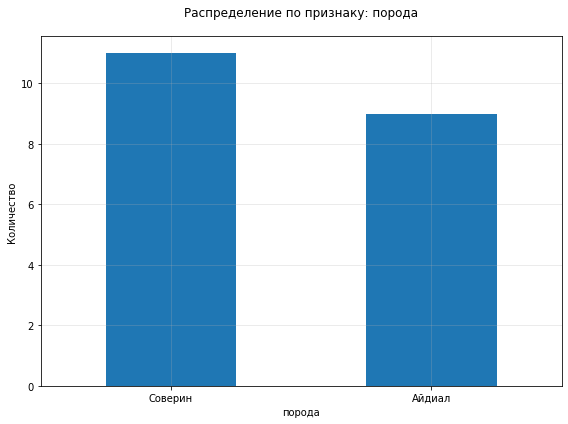

In [70]:
plot_feature_distribution('cow_buy_df', 'порода') 

В датасете с коровами для покупки преобладает порода Соверин- около 11 коров, порода Айдиал у 9 коров.\
Распределение отличается от датасета ferma_main, в котором Айдиал наиболее многочисленная группа (примерно 370 коров), а Соверин менее (их чуть больше 250).

In [71]:
cow_buy_df.columns

Index(['порода', 'тип_пастбища', 'порода_папы', 'имя_папы', 'жирность',
       'белок', 'возраст'],
      dtype='object')

#### 3.3.2 тип пастбища

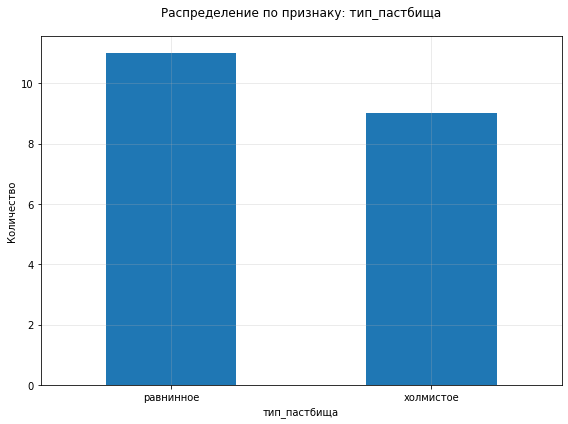

In [72]:
plot_feature_distribution('cow_buy_df', 'тип_пастбища') 

11 коров пасутстя на равнинном пастбище и 9 на холмистом.\
Это распредереление отличается от датасета ferma_main, в котором наибольшая группа - холмистый тип пастбища (около 350 коров), наименьшая группа - равнинный тип пастбища (около 270 коров).

In [73]:
cow_buy_df.columns

Index(['порода', 'тип_пастбища', 'порода_папы', 'имя_папы', 'жирность',
       'белок', 'возраст'],
      dtype='object')

#### 3.3.3 порода папы

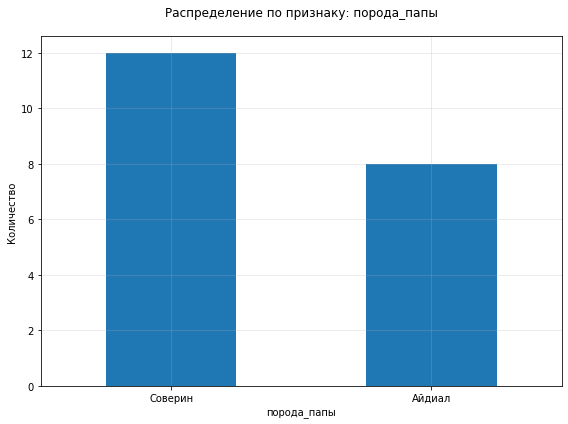

In [74]:
plot_feature_distribution('cow_buy_df', 'порода_папы') 

12 коров от быка Соверин и 8 от быка Айдиал.\
В датасете ferma_main распределение следующее - Айдиал (около 320) и Соверин (около 310).

In [75]:
cow_buy_df.columns

Index(['порода', 'тип_пастбища', 'порода_папы', 'имя_папы', 'жирность',
       'белок', 'возраст'],
      dtype='object')

#### 3.3.4 имя папы

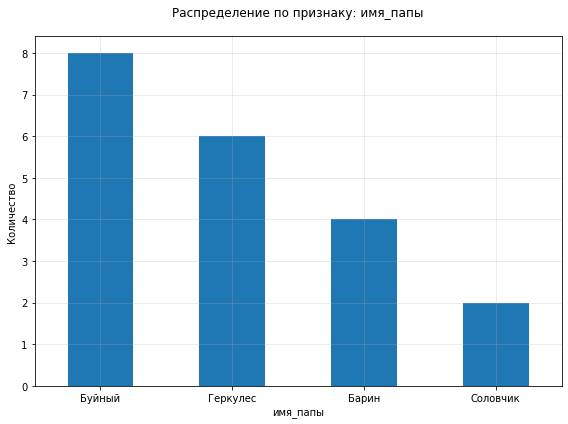

In [76]:
plot_feature_distribution('cow_buy_df', 'имя_папы') 

В датасете cow_buy_df слеюущее распределение потомства у быков:
- Буйный - 8 коров (в датасете ferma_dad у него второе место), 
- Геркулес - 6 коров (в датасете ferma_dad у него последнее место), 
- Барин - 4 коровы (в датасете ferma_dad у него первое место), 
- Соловчик - 2 коровы (в датасете ferma_dad у него предпоследнее место.

In [77]:
cow_buy_df.columns

Index(['порода', 'тип_пастбища', 'порода_папы', 'имя_папы', 'жирность',
       'белок', 'возраст'],
      dtype='object')

#### 3.3.5 жирность

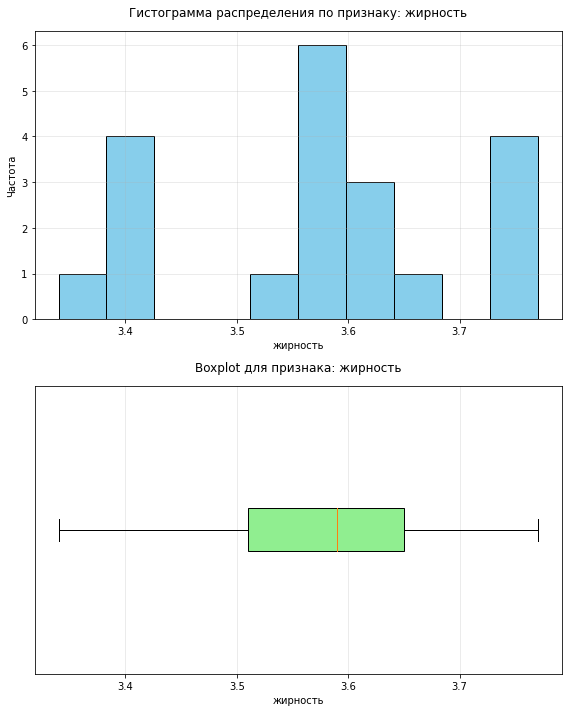

In [78]:
plot_feature_distribution('cow_buy_df', 'жирность') 

Распределение разбито на три выраженных интервала с пиками около 3,4, 3,6 и 3,75. Наибольшая частота значений лежит в интервале 3,55-3,6.
В датасете ferma_main наибольшее количество значений сконцентрированно в интервале 3,6-3,75.\
Выбросов нет.\
Отметим, что в датасете cow_buy рапределение по параметру "жирность" прерывистое, а в датасете ferma_main непрерывное.

In [79]:
cow_buy_df.columns

Index(['порода', 'тип_пастбища', 'порода_папы', 'имя_папы', 'жирность',
       'белок', 'возраст'],
      dtype='object')

#### 3.3.6 белок

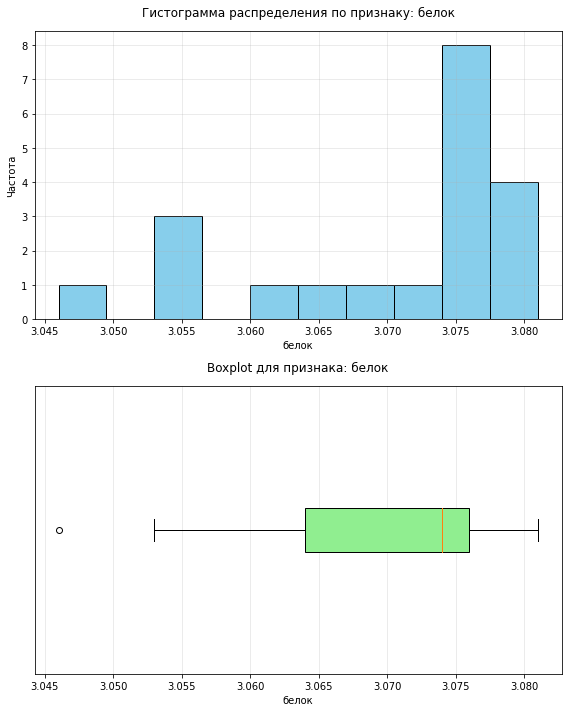

In [80]:
plot_feature_distribution('cow_buy_df', 'белок') 

Гистограмма параметра белок имеет распределение на интервале от 3,06 до примерно 3,081 с выраженным пиком примерно 3,074-3,077. Также наблюдаются отдельные значения на интервале примерно 3,046-3,049 и 3,054-3,056.\
Боксплот показывает единичное значение выброса - около 3,046.\
В датасете ferma_main по параметру "белок" гистограмму имеет два выраженных пика - около 3,074 и 3,078.

In [81]:
cow_buy_df.columns

Index(['порода', 'тип_пастбища', 'порода_папы', 'имя_папы', 'жирность',
       'белок', 'возраст'],
      dtype='object')

#### 3.3.7 возраст

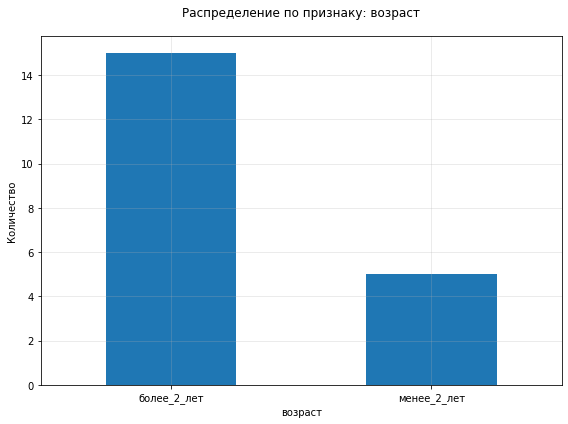

In [82]:
plot_feature_distribution('cow_buy_df', 'возраст') 

Коров возрастом более 2 лет 15 и менее 2 лет - 5.\
В датасете ferma_main коров возрастом более 2 лет также значительно больше, чем коров в возрасте до 2 лет.

#### Вывод

1. **Бимодальное распределение данных**:
Анализ гистограмм выявил явную бимодальность распределения, что указывает на возможное наличие скрытых подгрупп в данных. Это требует более детального сегментного анализа перед формулированием окончательных выводов.

2. **Анализ выбросов**:
Наблюдается один экстремальный выброс по показателю удоя, значительно превышающий остальные значения. Остальные точки в диаграммах "ящик с усами" находятся в допустимых пределах и могут быть оставлены для первичного анализа. Более тщательная проверка аномалий будет выполнена на этапе анализа остатков при построении моделей.

3. **Рекомендации по преобразованию признаков**:
Для показателей СПО и жирности молока рекомендуется рассмотреть преобразование в категориальную шкалу. Сильная асимметрия распределения этих признаков свидетельствует о вероятном наличии двух-трех скрытых групп в данных, что может быть лучше отражено через категориальное представление.

По итогам исследовательского анализа можно сделать вывод, что данные готовы к дальнейшему анализу.   

## 4. Корреляционный анализ

### 4.1 Расчет коэффициентов корреляции

Проведем корреляционный анализ признаков в датасете ferma_main.csv\
Рассчитаем коэффициент корреляции Фи, который находит взаимосвязь между категориальными, порядковыми и интервальными признаками. Визуализируем матрицу.

In [83]:
# cписок названий непрерывных столбцов
interval_columns = ['удой', 'эке', 'протеин', 'спо', 'жирность', 'белок']  

# вычисление корреляционной матрицы Phik
corr_matrix = ferma_main_df.phik_matrix(interval_cols=interval_columns)

# удалим строку и столбец 'id' из получившейся матрицы:
corr_matrix = corr_matrix.drop('id', axis=1).drop('id', axis=0)

In [84]:
corr_matrix

,удой,эке,протеин,спо,порода,тип_пастбища,порода_папы,жирность,белок,вкус_молока,возраст
удой,1.000000,0.720719,0.463224,0.661359,0.164744,0.279540,0.519915,0.707654,0.058970,0.173122,0.998101
эке,0.720719,1.000000,0.456484,0.591190,0.123086,0.106758,0.171355,0.715914,0.000000,0.272265,0.771596
протеин,0.463224,0.456484,1.000000,0.387188,0.090925,0.096474,0.000000,0.397380,0.202474,0.176480,0.351685
спо,0.661359,0.591190,0.387188,1.000000,0.062660,0.155349,0.425601,0.645581,0.073787,0.572702,0.744410
порода,0.164744,0.123086,0.090925,0.062660,1.000000,0.213218,0.089330,0.222825,0.361851,0.000000,0.057295
тип_пастбища,0.279540,0.106758,0.096474,0.155349,0.213218,1.000000,0.000000,0.000000,0.099908,0.269063,0.128455
порода_папы,0.519915,0.171355,0.000000,0.425601,0.089330,0.000000,1.000000,0.000000,0.134582,0.000000,0.355817
жирность,0.707654,0.715914,0.397380,0.645581,0.222825,0.000000,0.000000,1.000000,0.000000,0.198793,0.677913
белок,0.058970,0.000000,0.202474,0.073787,0.361851,0.099908,0.134582,0.000000,1.000000,0.143857,0.000000
вкус_молока,0.173122,0.272265,0.176480,0.572702,0.000000,0.269063,0.000000,0.198793,0.143857,1.000000,0.165974


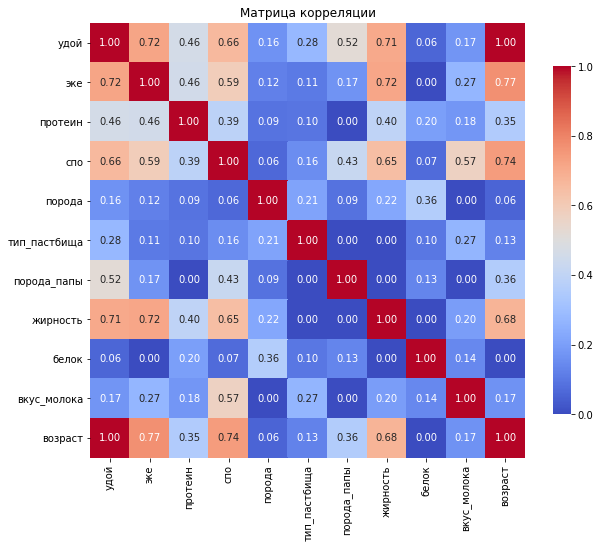

In [85]:
plt.figure(figsize=(10, 8))  
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True, cbar_kws={"shrink": .8})
plt.title('Матрица корреляции') 
plt.show()

Проведенный анализ выявил следующие закономерности:  

1. **Сильнейшая корреляция** (по шкале Чеддока) наблюдается между:  
   - **Удоем и возрастом коров** (r = 0.998) – практически линейная зависимость, что требует дополнительного изучения на предмет возможной причинно-следственной связи.  

2. **Сильные положительные связи** (r > 0.7):  
   - Удой и жирность молока (0.71)  
   - Удой и энергетическая ценность корма (ЭКЕ, 0.72)  
   - Возраст коров и ЭКЕ (0.77)  
   - Жирность молока и ЭКЕ (0.72)  
   - СПО и возраст коров (0.74)  

   Это говорит о том, что **качество кормления (ЭКЕ, СПО) и возраст коров** существенно влияют на продуктивность (удой) и качество молока (жирность).  

3. **Средние по силе корреляции** (0.5 ≤ r ≤ 0.7):  
   - Удой и СПО (0.66)  
   - СПО и жирность молока (0.65)  
   - Возраст и жирность (0.68)  
   - СПО и вкус молока (0.57)  
   - Порода быка-производителя и удой (0.52)  

   Эти зависимости указывают на **влияние рациона (СПО) и генетики (порода быка)** на молочную продуктивность.  

4. **Слабые корреляции** (r < 0.5):  
   - Белок молока и остальные параметры (r ≤ 0.4)  
   - Порода коровы и тип пастбища практически не влияют на другие показатели  

   Это означает, что **содержание белка в молоке слабо связано с условиями кормления и возрастом**, а порода и тип выпаса требуют более детального анализа, возможно, с учетом других факторов.  

### 4.2 Диаграммы рассеяния

Построим диаграммы рассеяния scatterplot для признака удой и всех количественных признаков с учётом значения категориальных признаков

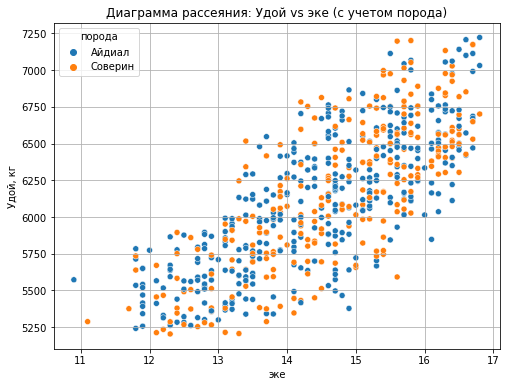

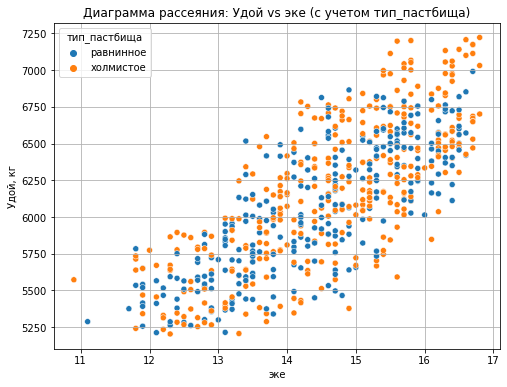

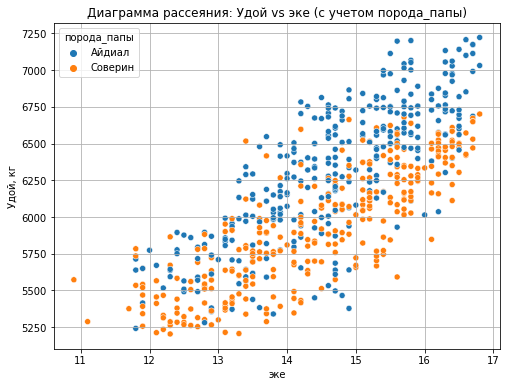

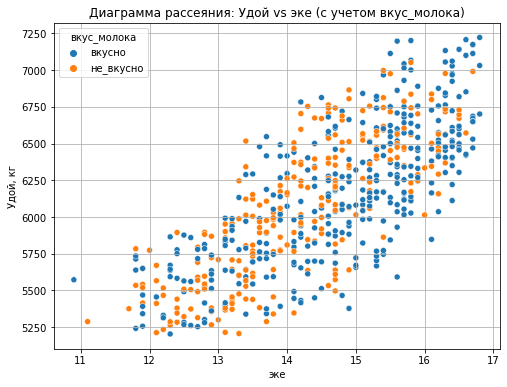

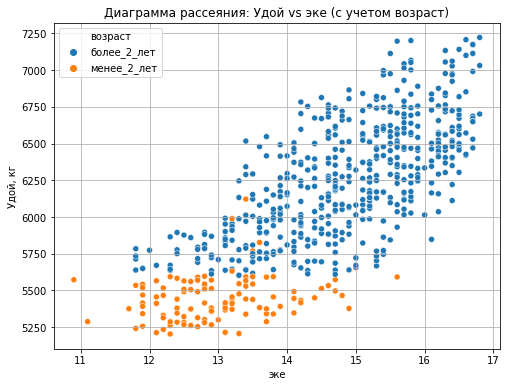

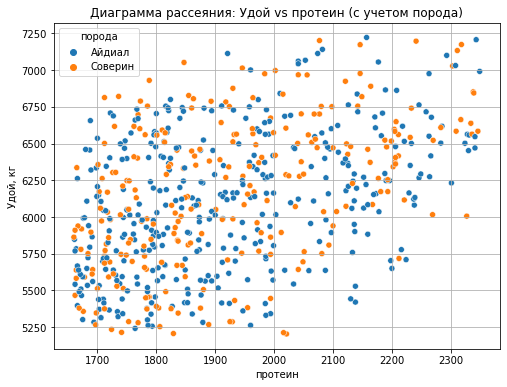

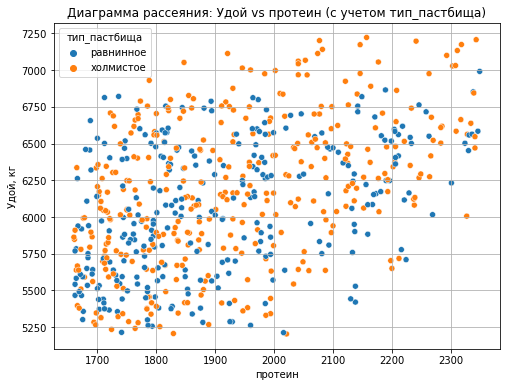

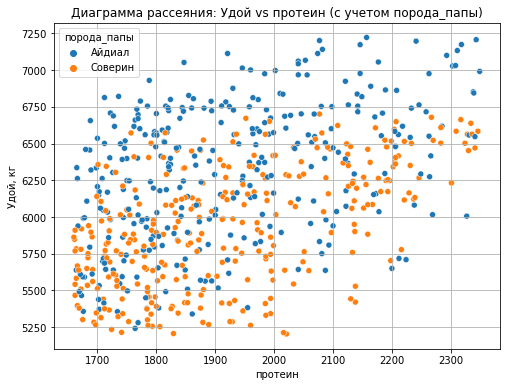

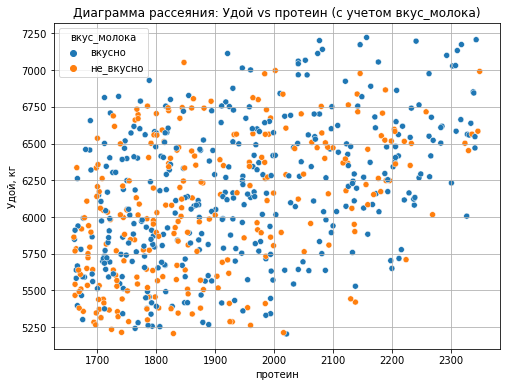

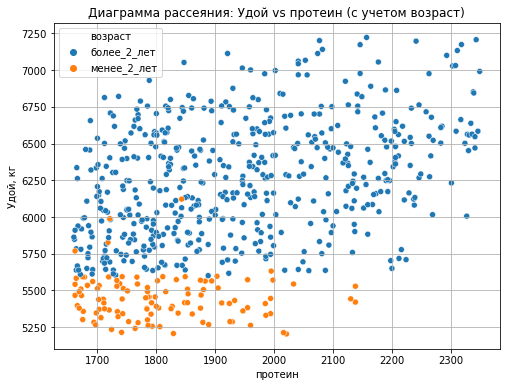

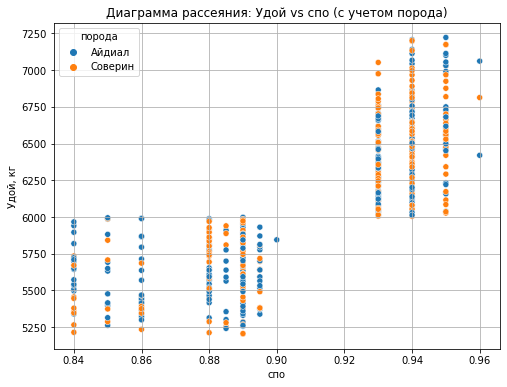

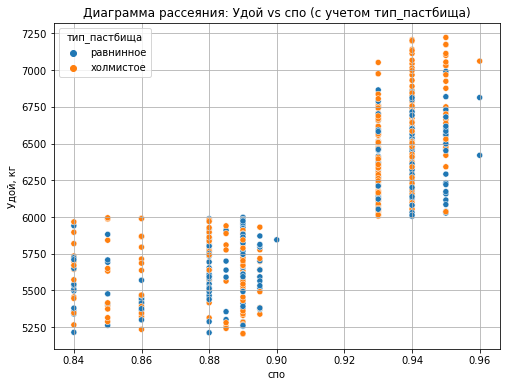

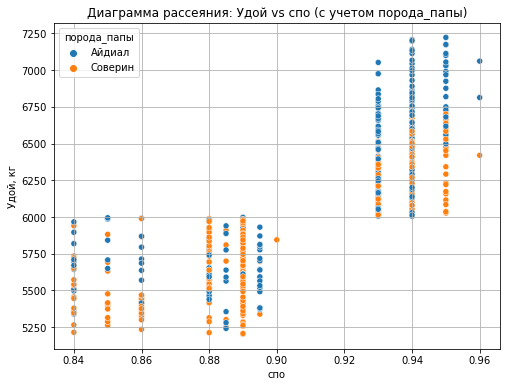

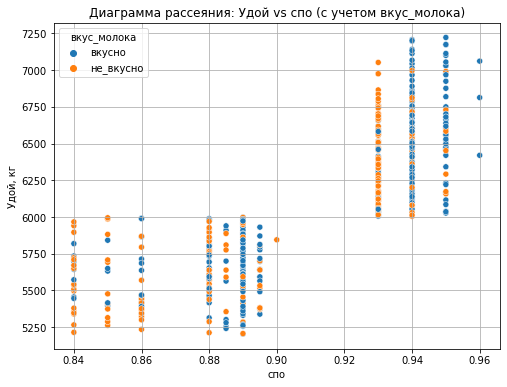

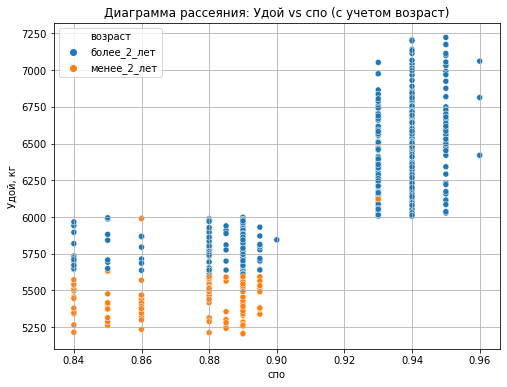

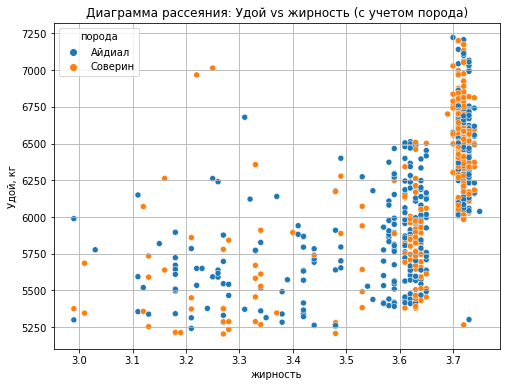

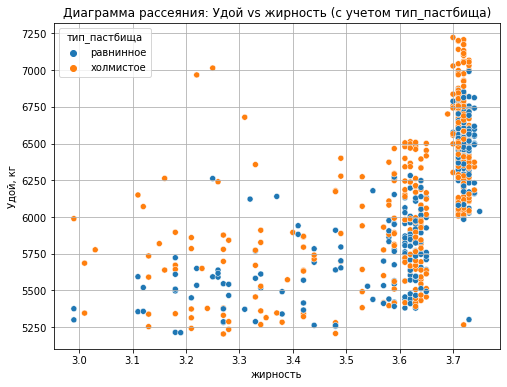

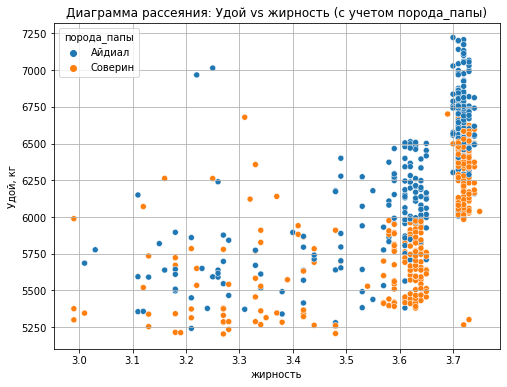

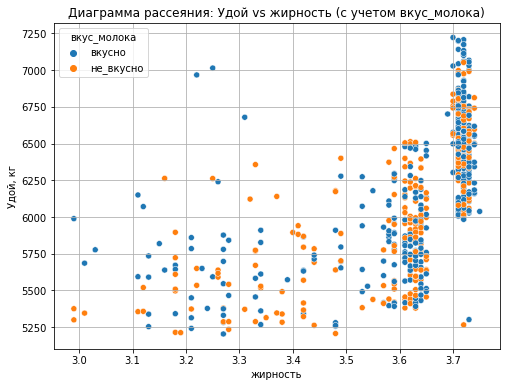

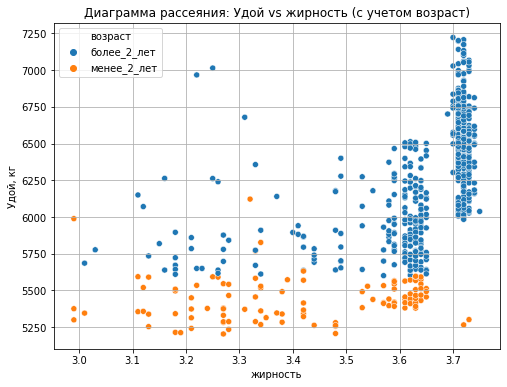

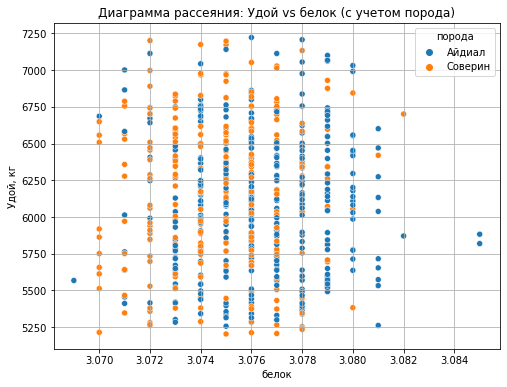

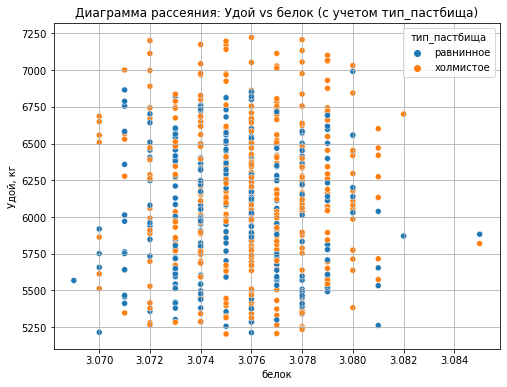

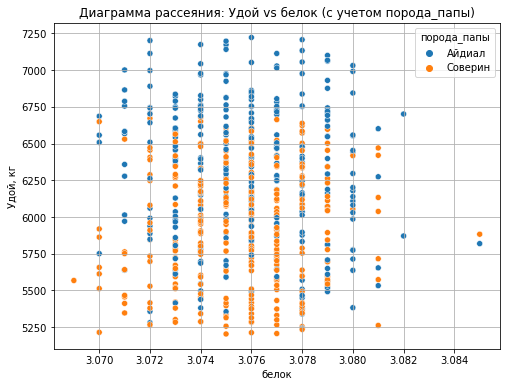

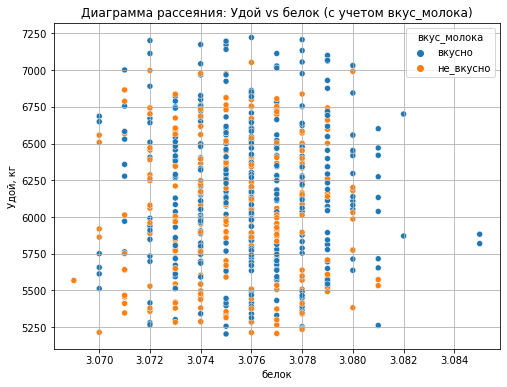

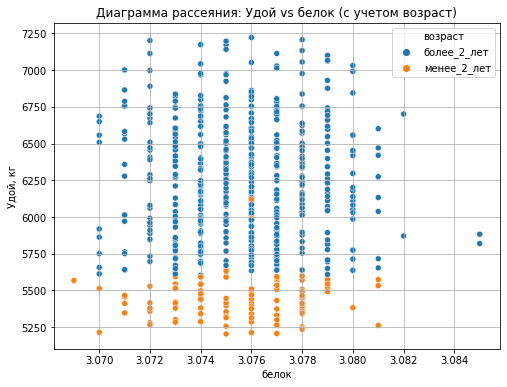

In [86]:
num_col_names = ['эке', 'протеин', 'спо', 'жирность', 'белок']
cat_col_names = ['порода', 'тип_пастбища', 'порода_папы', 'вкус_молока', 'возраст']

#цикл для построения диаграмм рассеяния 
#для количественных признаков с учетом категориальных
for num_col in num_col_names:
    for cat_col in cat_col_names:
        plt.figure(figsize=(8, 6)) #создаем новую фигуру для каждого графика
        sns.scatterplot(x=num_col, y='удой', data=ferma_main_df, hue=cat_col) 
        # было - sns.scatterplot(x='удой', y=num_col, data=ferma_main_df, hue=cat_col)
        plt.title(f'Диаграмма рассеяния: Удой vs {num_col} (с учетом {cat_col})')
        plt.xlabel(num_col) # было plt.xlabel('Удой, кг')
        plt.ylabel('Удой, кг') # было plt.ylabel(num_col)
        plt.grid(True)

        plt.show()

Вывод:

1. **Нелинейная зависимость между ЭКЕ и удоем**  
   Графический анализ (см. скрин) явно демонстрирует квадратичный характер связи между энергетической ценностью корма (ЭКЕ) и показателями удоя. Это означает, что:
   - Простая линейная модель будет недостаточно точной
   - Возведение ЭКЕ в квадрат или использование полиномиальной регрессии значительно улучшит качество модели
   - Пик продуктивности, судя по графику, достигается при определённом оптимальном уровне ЭКЕ

2. **Категоризация СПО**  
   Анализ распределения сахаро-протеинового отношения (СПО) показывает:
   - Чёткую границу разделения данных в диапазоне 0.91-0.92
   - Перевод СПО в категориальную переменную (например, "низкое СПО" <0.92 и "высокое СПО" ≥0.92) может дать:
     * Более интерпретируемые результаты
     * Улучшение предсказательной способности модели
     * Выявление скрытых закономерностей в группах

3. **Практические следствия для моделирования**  
   Указанные преобразования позволят:
   - Учесть реальную нелинейную природу зависимости удоя от ЭКЕ
   - Выделить значимые качественные уровни СПО
   - Повысить точность прогнозных моделей
   - Получить более содержательные выводы для практического применения

Эти наблюдения основаны на визуальном анализе графиков распределения и требуют экспериментальной проверки при построении регрессионных моделей.

### Вывод:

1. **Нелинейные зависимости**:
- Чётко прослеживается нелинейная взаимосвязь между СПО и жирностью молока во всех анализируемых группах
- Для более точного моделирования рекомендуется создать новые производные факторы, учитывающие эти нелинейные закономерности

2. **Влияние генетического фактора**:
- Анализ по группам "порода_папы_быка" выявил существенные различия в корреляционных связях
- Предварительные данные свидетельствуют, что генетический фактор (порода быка-производителя) может оказывать более сильное влияние на удой, чем другие параметры
- Это предположение требует проверки при построении третьей линейной модели

3. **Мультиколлинеарность**:
- Признаки мультиколлинеарности в данных не обнаружены
- Отсутствуют чёткие линейные зависимости между предикторами ("узкие облака" на графиках)

4. **Особенности зависимости от ЭКЕ**:
- Взаимосвязь между энергетической ценностью корма и удоем имеет сложный характер
- Для учёта кривизны зависимости рекомендуется добавить квадратичный член фактора ЭКЕ
- Эффективность такого преобразования будет проверена во второй линейной модели

5. **Возрастные закономерности**:
- Чётко прослеживается положительная зависимость между возрастом коров и удоем
- Молодые особи демонстрируют значительно меньшую продуктивность
- СПО-коррекция применяется преимущественно для возрастных животных

Эти наблюдения подчёркивают необходимость:
- Учёта нелинейных эффектов при моделировании
- Детального анализа генетического влияния
- Проверки эффективности квадратичного преобразования для ЭКЕ
- Учёта возрастных особенностей животных

## 5 Обучение модели линейной регрессии

### 5.1 Первая модель LinearRegression

Перед нами задача регресси, мы будем обучать модель Linear Regression с учителем.\
В качестве целевого мы будем использовать признак Удой, кг.\
Нам нужно отобрать признаки, которые подходят для модели линейной регрессии, аргументируя выбор.

In [87]:
ferma_main_df.columns

Index(['id', 'удой', 'эке', 'протеин', 'спо', 'порода', 'тип_пастбища',
       'порода_папы', 'жирность', 'белок', 'вкус_молока', 'возраст'],
      dtype='object')

Для первой модели линейной регрессии выберем следующие признаки исходя из предположения, что они влияют на удой:
- показатели качество корма (`эке`, `протеин`, `спо` ) - чем питательнее корм, тем больше ресурсов у коровы для лактации, что положительно сказывается на удое.
- генетика (`порода` коровы и `порода папы` коровы) - некоторые породы генетически предрасположены к более высокой молочной продуктивности. 
- `тип пастбища` - разнообразие и качество травы на пастбище влияют на кормление и, следовательно, на удой.
- `возраст` коровы - удой меняется в течение жизни коровы, достигая пика в среднем возрасте и снижаясь к старости. 

Исключаем следующие признаки:
- характеристики состава молока (`жирность`, `белок`). Удой - это *объем* молока, а жирность и белок - это *состав*. 
- `вкус_молока` - субъективная оценка, которая никак не связана с удоем.


In [88]:
def linear_regression_pipeline(data,
                              target_col,
                              cat_col,
                              num_col):
    
    #создание константы RANDOM_STATE
    RANDOM_STATE = 42

    #выделяем в отдельные переменные целевой признак и входные признаки
    X = ferma_main_df[cat_col+num_col]
    y = ferma_main_df[target_col]

    #разделяем данные на тренировочные и тестовые, зафиксируем random_state
    X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    random_state = RANDOM_STATE)

    ## подготовка признаков (масштабирование и кодирование)
    encoder = OneHotEncoder(handle_unknown='ignore', drop='first', sparse_output=False)
    X_train_ohe = encoder.fit_transform(X_train[cat_col])
    X_test_ohe = encoder.transform(X_test[cat_col])

    encoder_col = encoder.get_feature_names_out()

    X_train_ohe = pd.DataFrame(X_train_ohe, columns=encoder_col)
    X_test_ohe = pd.DataFrame(X_test_ohe, columns=encoder_col)

    scaler = StandardScaler()

    X_train_scaled = scaler.fit_transform(X_train[num_col])
    X_test_scaled = scaler.transform(X_test[num_col])    

    X_train_scaled = pd.DataFrame(X_train_scaled, columns=num_col)
    X_test_scaled = pd.DataFrame(X_test_scaled, columns=num_col)
    
    
    X_train = pd.concat([X_train_ohe, X_train_scaled], axis=1)
    X_test = pd.concat([X_test_ohe, X_test_scaled], axis=1)

    # обучение модели и получение предсказаний на тестовых данных
    model_lr  = LinearRegression()
    model_lr.fit(X_train, y_train)
    predictions = model_lr.predict(X_test)

    # рассчитайте R2 для линейной регрессии
    r2 = r2_score(y_test, predictions)

    # вывод полученных значений
    print(f"R2 LinearRegression = {r2:.3f}")

    # проведите анализ остатков
    # перед этим рассчитайте остатки
    residuals = y_test - predictions

    # постройте графики по количественным признакам — гистограмму частотности 
    # распределения и диаграмму рассеяния
    fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10,5))
    axes[0].hist(residuals)
    axes[0].set_title('Гистограмма распределения остатков')
    axes[0].set_xlabel('Остатки')

    axes[1].scatter(x=predictions, y=residuals)
    axes[1].set_xlabel('Предсказания модели')
    axes[1].set_ylabel('Остатки')
    axes[1].set_title('Анализ дисперсии')
    plt.show()

    return model_lr, r2, predictions, residuals, encoder, scaler

R2 LinearRegression = 0.784


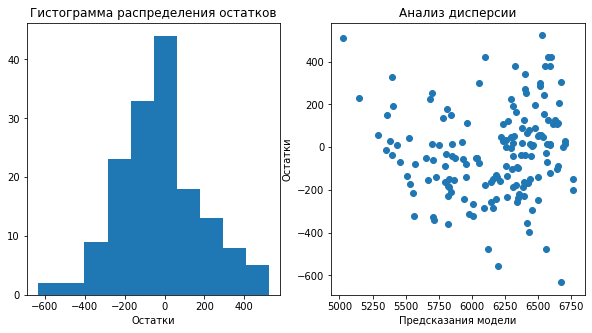

In [89]:
target_col = 'удой'
cat_col = ['порода', 'тип_пастбища', 'порода_папы', 'возраст']
num_col = ['эке', 'протеин', 'спо']

model_lr_1, r2_1, predictions_1, residuals_1, encoder_1, scaler_1 = linear_regression_pipeline(
    data=ferma_main_df.copy(), #передаем копию DataFrame, чтобы не менять исходные данные
    target_col='удой',
    cat_col=['порода', 'тип_пастбища', 'порода_папы', 'возраст'],
    num_col=['эке', 'протеин', 'спо']
)

1. **Текущие показатели модели**  
   - Высокий **R²** свидетельствует о хорошем описании данных, но есть потенциал для дальнейшего роста точности.  

2. **Проблемы в остатках**  
   - Наблюдается **гетероскедастичность** (неоднородность дисперсии ошибок):  
     - При значениях целевой переменной **до 6000** разброс ошибок стабилен.  
     - При значениях **свыше 6000** дисперсия остатков возрастает, что делает прогнозы менее надёжными.  
   - **Гистограмма остатков** близка к нормальному распределению, но имеет локальные всплески, указывающие на неучтённые закономерности.  

3. **Выявленные нелинейности**  
   - В ходе EDA обнаружено, что:  
     - **ЭКЕ** имеет **квадратичную** связь с целевой переменной → стоит добавить **ЭКЕ²** в модель.  
     - **СПО** демонстрирует **пороговый эффект** → его следует преобразовать в **категориальную переменную** (границы категорий требуют уточнения на основе данных).  

4. **Рекомендации по улучшению модели**  
   - **Добавить квадратичный член** для ЭКЕ (`ЭКЕ²`).  
   - **Преобразовать СПО** в категориальный признак, тщательно проанализировав границы категорий.  
   - **Проверить альтернативные модели** (например, логарифмирование целевой переменной или использование гребневой регрессии) для борьбы с гетероскедастичностью.  

**Итог**:  
Текущая модель требует доработки из-за нелинейностей и нестабильности ошибок. Ключевые шаги для улучшения — преобразование ЭКЕ и СПО, а также проверка методов, устойчивых к гетероскедастичности.

### 5.2 Вторая модель LinearRegression

Мы обнаружили, что СПО и Удой связаны нелинейно. На их диаграмме рассеяния наблюдения сгруппированы в два кластера, причём есть такое значение СПО, которое можно считать границей между кластерами (0,92). Чтобы устранить нелинейность, преобразуем СПО в категориальный бинарный признак, использовав эту границу.

In [90]:
#cоздаем новый столбец 'спо_bin' на основе условия
ferma_main_df['спо_bin'] = ferma_main_df['спо'].apply(lambda x: 0 if x < 0.92 else 1)

#dыводим первые 5 строк для проверки
ferma_main_df.head()

,id,удой,эке,протеин,спо,порода,тип_пастбища,порода_папы,жирность,белок,вкус_молока,возраст,спо_bin
0,1,5863.0,14.2,1743.0,0.890,Айдиал,равнинное,Айдиал,3.58,3.076,вкусно,более_2_лет,0
1,2,5529.0,12.8,2138.0,0.890,Айдиал,равнинное,Соверин,3.54,3.079,вкусно,менее_2_лет,0
2,3,5810.0,14.0,1854.0,0.885,Соверин,холмистое,Соверин,3.59,3.074,не_вкусно,более_2_лет,0
3,4,5895.0,12.4,2012.0,0.885,Соверин,холмистое,Айдиал,3.40,3.075,не_вкусно,более_2_лет,0
4,5,5302.0,12.8,1675.0,0.885,Айдиал,равнинное,Соверин,3.73,3.073,вкусно,менее_2_лет,0


Мы обнаружили, что ЭКЕ и Удой также связаны нелинейно. Нелинейность между ними можно исключить, если ввести новый признак ЭКЕ в квадрате.

In [91]:
# Создаем новый столбец 'эке_квадрат'
ferma_main_df['эке_квадрат'] = ferma_main_df['эке'] ** 2

# Выводим первые 5 строк для проверки
ferma_main_df.head()

,id,удой,эке,протеин,спо,порода,тип_пастбища,порода_папы,жирность,белок,вкус_молока,возраст,спо_bin,эке_квадрат
0,1,5863.0,14.2,1743.0,0.890,Айдиал,равнинное,Айдиал,3.58,3.076,вкусно,более_2_лет,0,201.64
1,2,5529.0,12.8,2138.0,0.890,Айдиал,равнинное,Соверин,3.54,3.079,вкусно,менее_2_лет,0,163.84
2,3,5810.0,14.0,1854.0,0.885,Соверин,холмистое,Соверин,3.59,3.074,не_вкусно,более_2_лет,0,196.00
3,4,5895.0,12.4,2012.0,0.885,Соверин,холмистое,Айдиал,3.40,3.075,не_вкусно,более_2_лет,0,153.76
4,5,5302.0,12.8,1675.0,0.885,Айдиал,равнинное,Соверин,3.73,3.073,вкусно,менее_2_лет,0,163.84


In [92]:
ferma_main_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 628 entries, 0 to 628
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   id            628 non-null    int64  
 1   удой          628 non-null    float64
 2   эке           628 non-null    float64
 3   протеин       628 non-null    float64
 4   спо           628 non-null    float64
 5   порода        628 non-null    object 
 6   тип_пастбища  628 non-null    object 
 7   порода_папы   628 non-null    object 
 8   жирность      628 non-null    float64
 9   белок         628 non-null    float64
 10  вкус_молока   628 non-null    object 
 11  возраст       628 non-null    object 
 12  спо_bin       628 non-null    int64  
 13  эке_квадрат   628 non-null    float64
dtypes: float64(7), int64(2), object(5)
memory usage: 73.6+ KB


Создадим вторую модель.

R2 LinearRegression = 0.818


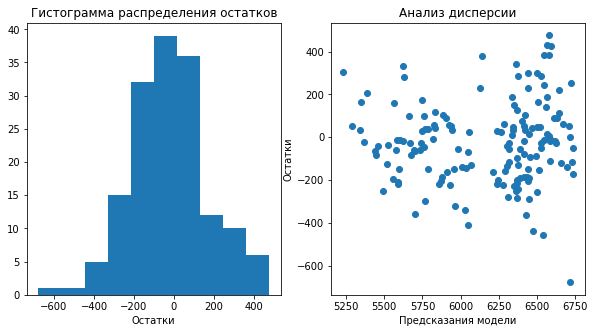

In [94]:
target_col = ['удой']
cat_col = ['порода', 'тип_пастбища', 'порода_папы', 'возраст', 'спо_bin']
num_col = ['эке_квадрат', 'протеин']

model_lr_2, r2_2, predictions_2, residuals_2, encoder_2, scaler_2 = linear_regression_pipeline(
    data=ferma_main_df.copy(), # Передаем копию DataFrame, чтобы не менять исходные данные
    target_col=target_col,
    cat_col=cat_col,
    num_col=num_col
)

Итоги анализа модели:
1. **R² вырос** до 0,82 по сравнению 0.784 в предыдущей модели- улучшение значимое  
2. **Остатки стабилизировались**:
   - Дисперсия стала равномернее
   - Сохраняются 2 зоны, но различия случайны  
3. **Распределение**:
   - Есть бимодальность и смещение (можно улучшить)  

**Вывод**:  
Модель готова к использованию, но имеет потенциал для доработки.  

### 5.3 Третяя модель LinearRegression

Добавим признак Имя Папы из файла ferma_dad, соединив его с остальными данными ferma_main по ключу.

In [95]:
# Объединяем DataFrame'ы по ключу 'id'
ferma_main_df = pd.merge(ferma_main_df, ferma_dad_df, on='id', how='left')

In [96]:
# Выводим первые 5 строк для проверки
ferma_main_df.head()

,id,удой,эке,протеин,спо,порода,тип_пастбища,порода_папы,жирность,белок,вкус_молока,возраст,спо_bin,эке_квадрат,имя_папы
0,1,5863.0,14.2,1743.0,0.890,Айдиал,равнинное,Айдиал,3.58,3.076,вкусно,более_2_лет,0,201.64,Буйный
1,2,5529.0,12.8,2138.0,0.890,Айдиал,равнинное,Соверин,3.54,3.079,вкусно,менее_2_лет,0,163.84,Соловчик
2,3,5810.0,14.0,1854.0,0.885,Соверин,холмистое,Соверин,3.59,3.074,не_вкусно,более_2_лет,0,196.00,Барин
3,4,5895.0,12.4,2012.0,0.885,Соверин,холмистое,Айдиал,3.40,3.075,не_вкусно,более_2_лет,0,153.76,Буйный
4,5,5302.0,12.8,1675.0,0.885,Айдиал,равнинное,Соверин,3.73,3.073,вкусно,менее_2_лет,0,163.84,Барин


Признак имя папы добавлен успешно

In [97]:
ferma_main_df.columns

Index(['id', 'удой', 'эке', 'протеин', 'спо', 'порода', 'тип_пастбища',
       'порода_папы', 'жирность', 'белок', 'вкус_молока', 'возраст', 'спо_bin',
       'эке_квадрат', 'имя_папы'],
      dtype='object')

In [98]:
ferma_main_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 628 entries, 0 to 627
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   id            628 non-null    int64  
 1   удой          628 non-null    float64
 2   эке           628 non-null    float64
 3   протеин       628 non-null    float64
 4   спо           628 non-null    float64
 5   порода        628 non-null    object 
 6   тип_пастбища  628 non-null    object 
 7   порода_папы   628 non-null    object 
 8   жирность      628 non-null    float64
 9   белок         628 non-null    float64
 10  вкус_молока   628 non-null    object 
 11  возраст       628 non-null    object 
 12  спо_bin       628 non-null    int64  
 13  эке_квадрат   628 non-null    float64
 14  имя_папы      628 non-null    object 
dtypes: float64(7), int64(2), object(6)
memory usage: 78.5+ KB


R2 LinearRegression = 0.825


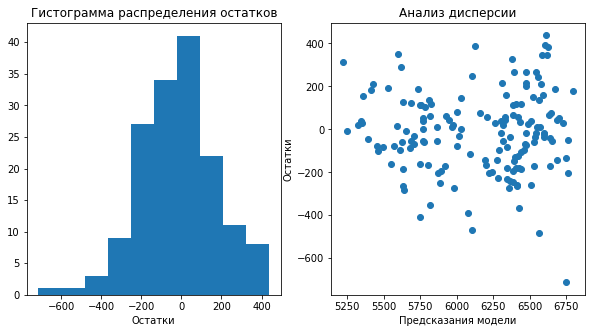

In [99]:
target_col = ['удой']
cat_col = ['порода', 'тип_пастбища', 'порода_папы', 'возраст', 'спо_bin', 'имя_папы']
num_col = ['эке_квадрат', 'протеин']

model_lr_3, r2_3, predictions_3, residuals_3, encoder_3, scaler_3 = linear_regression_pipeline(
    data=ferma_main_df.copy(), # Передаем копию DataFrame, чтобы не менять исходные данные
    target_col=target_col,
    cat_col=cat_col,
    num_col=num_col
)

Коэффициент детерминации R2 LinearRegression третьей модели составил 0.825, что выше чем у второй модели (0,82) и первой (0.784). Третья модель делает проноз точнее, чем первая и вторая, но по прежнему ошибается. В 82,5% случаев предсказание модели точнее, чем среднее значение целевого признака.

Распределение остатков третьей модели стал симметричнее, чем у второй модели, смещением влево сохраняется-  модель чаще ошибается в меньшую сторону - занижая прогнозный показатель.

Анализ дисперсии остатков показывает, что остатки распределены хаотично, без видимой зависимости.

### 5.4 Сравнение качества трёх моделей линейной регрессии

Самый высокий коэффициент детерминации R2 LinearRegression наблюдается у третьей модели - он составил 0.825, что выше чем у второй модели (0,82) и первой (0.784). Третья модель делает проноз точнее, чем первая и вторая, но по прежнему ошибается. В 82,5% случаев предсказание третьей модели точнее, чем среднее значение целевого признака.

Распределение остатков третьей модели симметричнее, чем у второй и первой модели. У всех трех моделей наблюдается смещение влево-  модель чаще ошибается в меньшую сторону - занижая прогнозный показатель.

Анализ дисперсии остатков показывает, что остатки всех трех моделей распределены хаотично, без видимой зависимости.

### 5.5 Оценим качество каждой модели по метрикам: MSE, MAE, RMSE

In [100]:
# Функции для расчета метрик с вычислением y_true внутри
def calculate_mse(predictions, residuals):
    y_true = residuals + predictions
    return mean_squared_error(y_true, predictions)

def calculate_mae(predictions, residuals):
    y_true = residuals + predictions
    return mean_absolute_error(y_true, predictions)

def calculate_rmse(predictions, residuals):
    y_true = residuals + predictions
    return np.sqrt(mean_squared_error(y_true, predictions))

In [101]:
# Создаем список результатов для удобства
results = [(predictions_1, residuals_1), 
           (predictions_2, residuals_2), 
           (predictions_3, residuals_3)]

# Оценка качества моделей
for i, (predictions, residuals) in enumerate(results):
    print(f"Модель {i+1}:")
    mse = calculate_mse(predictions, residuals) 
    mae = calculate_mae(predictions, residuals)
    rmse = calculate_rmse(predictions, residuals)
    print(f" MSE: {mse:.3f}")
    print(f" MAE: {mae:.3f}")
    print(f" RMSE: {rmse:.3f}")
    print("-" * 20)

Модель 1:
 MSE: 43887.015
 MAE: 164.242
 RMSE: 209.492
--------------------
Модель 2:
 MSE: 37030.911
 MAE: 149.040
 RMSE: 192.434
--------------------
Модель 3:
 MSE: 35673.890
 MAE: 146.163
 RMSE: 188.875
--------------------


Выберем лучшую модель.
Из предоставленных данных видно, что Модель 3 демонстрирует наилучшие показатели по всем трем метрикам:

* MSE: 35673.890 - наименьшее значение среди всех моделей.
* MAE: 146.163 - также наименьшее значение.
* RMSE: 188.875 - опять же, наименьшее значение.

Чем меньше значения этих метрик, тем лучше модель предсказывает целевую переменную. 

Основываясь на полученных метриках, модель 3 является лучшей из трех. 

Укажем доверительный интервал прогноза лучшей модели. Для этого рассчитаем квантили ошибки модели на тренировочных данных.

In [102]:
#задаем уровень доверия 95%
confidence_level = 0.95
alpha = 1 - confidence_level

#расчет квантилей ошибки
lower_quantile = np.quantile(residuals_3, alpha / 2)
upper_quantile = np.quantile(residuals_3, 1 - alpha / 2)

print(f"Доверительный интервал для предсказаний модели model_lr_3 ({confidence_level * 100}%): "
      f"[{lower_quantile:.3f}, {upper_quantile:.3f}]")


Доверительный интервал для предсказаний модели model_lr_3 (95.0%): [-393.100, 355.937]


Полученный интервал [-393.100, 355.937]  показывает разброс остатков модели, то есть разницу между фактическими значениями удоя и предсказаниями модели. Он говорит о том, что с вероятностью 95% ошибка модели (разница между предсказанием и реальным удоем) будет лежать в этом диапазоне

### 5.6 Прогноз удоя коров, которых фермер хочет купить

С помощью лучшей модели спрогнозируем удой коров, которых фермер хочет купить.

Добавим недостающие признаки ЭКЕ (Энергетическая кормовая единица), Сырой протеин, г и СПО (Сахаро-протеиновое соотношение): возьмите из датасета ferma_main.csv средние значения каждого из признаков и увеличьте их на 5%.

In [103]:
ferma_main_df.columns

Index(['id', 'удой', 'эке', 'протеин', 'спо', 'порода', 'тип_пастбища',
       'порода_папы', 'жирность', 'белок', 'вкус_молока', 'возраст', 'спо_bin',
       'эке_квадрат', 'имя_папы'],
      dtype='object')

In [104]:
#рассчитываем средние значения признаков + 5%
#добавляем недостающие признаки в cow_buy_df
cow_buy_df['эке'] = ferma_main_df['эке'].mean() * 1.05
cow_buy_df['протеин'] = ferma_main_df['протеин'].mean() * 1.05
cow_buy_df['спо'] = ferma_main_df['спо'].mean() * 1.05

In [105]:
cow_buy_df['спо'].unique

<bound method Series.unique of 0     0.958744
1     0.958744
2     0.958744
3     0.958744
4     0.958744
5     0.958744
6     0.958744
7     0.958744
8     0.958744
9     0.958744
10    0.958744
11    0.958744
12    0.958744
13    0.958744
14    0.958744
15    0.958744
16    0.958744
17    0.958744
18    0.958744
19    0.958744
Name: спо, dtype: float64>

In [106]:
cow_buy_df.head()

,порода,тип_пастбища,порода_папы,имя_папы,жирность,белок,возраст,эке,протеин,спо
0,Айдиал,холмистое,Айдиал,Геркулес,3.58,3.076,более_2_лет,15.276162,2019.947532,0.958744
1,Айдиал,равнинное,Соверин,Буйный,3.54,3.081,менее_2_лет,15.276162,2019.947532,0.958744
2,Соверин,равнинное,Соверин,Барин,3.59,3.074,более_2_лет,15.276162,2019.947532,0.958744
3,Соверин,холмистое,Айдиал,Буйный,3.40,3.061,более_2_лет,15.276162,2019.947532,0.958744
4,Соверин,равнинное,Айдиал,Буйный,3.64,3.074,более_2_лет,15.276162,2019.947532,0.958744


Выполните подготовку данных, аналогичную той, которую делали для тренировочной выборки.

In [107]:
#создаем новый столбец 'спо_bin' на основе условия
cow_buy_df['спо_bin'] = cow_buy_df['спо'].apply(lambda x: 0 if x < 0.92 else 1)

In [108]:
cow_buy_df['спо_bin'].unique

<bound method Series.unique of 0     1
1     1
2     1
3     1
4     1
5     1
6     1
7     1
8     1
9     1
10    1
11    1
12    1
13    1
14    1
15    1
16    1
17    1
18    1
19    1
Name: спо_bin, dtype: int64>

In [109]:
cow_buy_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   порода        20 non-null     object 
 1   тип_пастбища  20 non-null     object 
 2   порода_папы   20 non-null     object 
 3   имя_папы      20 non-null     object 
 4   жирность      20 non-null     float64
 5   белок         20 non-null     float64
 6   возраст       20 non-null     object 
 7   эке           20 non-null     float64
 8   протеин       20 non-null     float64
 9   спо           20 non-null     float64
 10  спо_bin       20 non-null     int64  
dtypes: float64(5), int64(1), object(5)
memory usage: 1.8+ KB


In [111]:
#создаем новый столбец 'эке_квадрат'
cow_buy_df['эке_квадрат'] = cow_buy_df['эке'] ** 2

In [112]:
#выводим первые 5 строк для проверки
cow_buy_df.head()

,порода,тип_пастбища,порода_папы,имя_папы,жирность,белок,возраст,эке,протеин,спо,спо_bin,эке_квадрат
0,Айдиал,холмистое,Айдиал,Геркулес,3.58,3.076,более_2_лет,15.276162,2019.947532,0.958744,1,233.361138
1,Айдиал,равнинное,Соверин,Буйный,3.54,3.081,менее_2_лет,15.276162,2019.947532,0.958744,1,233.361138
2,Соверин,равнинное,Соверин,Барин,3.59,3.074,более_2_лет,15.276162,2019.947532,0.958744,1,233.361138
3,Соверин,холмистое,Айдиал,Буйный,3.40,3.061,более_2_лет,15.276162,2019.947532,0.958744,1,233.361138
4,Соверин,равнинное,Айдиал,Буйный,3.64,3.074,более_2_лет,15.276162,2019.947532,0.958744,1,233.361138


In [113]:
cow_buy_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   порода        20 non-null     object 
 1   тип_пастбища  20 non-null     object 
 2   порода_папы   20 non-null     object 
 3   имя_папы      20 non-null     object 
 4   жирность      20 non-null     float64
 5   белок         20 non-null     float64
 6   возраст       20 non-null     object 
 7   эке           20 non-null     float64
 8   протеин       20 non-null     float64
 9   спо           20 non-null     float64
 10  спо_bin       20 non-null     int64  
 11  эке_квадрат   20 non-null     float64
dtypes: float64(6), int64(1), object(5)
memory usage: 2.0+ KB


Получите прогноз удоя коров.

In [114]:
cow_buy_df.columns

Index(['порода', 'тип_пастбища', 'порода_папы', 'имя_папы', 'жирность',
       'белок', 'возраст', 'эке', 'протеин', 'спо', 'спо_bin', 'эке_квадрат'],
      dtype='object')

In [115]:
cow_buy_predict = cow_buy_df.copy()

## подготовка признаков (масштабирование и кодирование)
cow_buy_predict_ohe = encoder_3.transform(cow_buy_predict[cat_col])
    
encoder_col = encoder_3.get_feature_names_out()

cow_buy_predict_scaled = scaler_3.transform(cow_buy_predict[num_col])

cow_buy_predict_ohe = pd.DataFrame(cow_buy_predict_ohe, columns=encoder_col)
cow_buy_predict_scaled = pd.DataFrame(cow_buy_predict_scaled, columns=num_col)

cow_buy_predict = pd.concat([cow_buy_predict_ohe, cow_buy_predict_scaled], axis=1)

In [116]:
# Делаем предсказания
predictions_buy = model_lr_3.predict(cow_buy_predict)

# Добавляем предсказания в исходный DataFrame
cow_buy_predict['predicted_удой'] = predictions_buy

cow_buy_predict

,порода_Соверин,тип_пастбища_холмистое,порода_папы_Соверин,возраст_менее_2_лет,спо_bin_1,имя_папы_Буйный,имя_папы_Геркулес,имя_папы_Соловчик,эке_квадрат,протеин,predicted_удой
0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.542248,0.517384,6609.919297
1,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.542248,0.517384,6378.711028
2,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.542248,0.517384,6283.999775
3,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.542248,0.517384,6593.089377
4,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.542248,0.517384,6542.146066
5,1.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,0.542248,0.517384,6425.380218
6,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.542248,0.517384,6609.919297
7,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.542248,0.517384,6571.259737
8,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.542248,0.517384,6283.999775
9,1.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.542248,0.517384,6400.540668


### Вывод:

Мы обучили три модели линейной регресии и выбрали на основе метрик лучшую из них - третью модель.\
С помощью третьей модели мы получили пргонзные значения удоя для коров, которых собирается купить фермер.

## 6 Обучение модели логистической регрессии

### 6.1 Модель LogisticRegression

Перед нами задача обучения с учителем: бинарная классификация.\
Для ее решения будем использовать модель LogisticRegression.\
Вкачестве целевого признака будем использовать признак вкус молока.

In [117]:
ferma_main_df.head(5)

,id,удой,эке,протеин,спо,порода,тип_пастбища,порода_папы,жирность,белок,вкус_молока,возраст,спо_bin,эке_квадрат,имя_папы
0,1,5863.0,14.2,1743.0,0.890,Айдиал,равнинное,Айдиал,3.58,3.076,вкусно,более_2_лет,0,201.64,Буйный
1,2,5529.0,12.8,2138.0,0.890,Айдиал,равнинное,Соверин,3.54,3.079,вкусно,менее_2_лет,0,163.84,Соловчик
2,3,5810.0,14.0,1854.0,0.885,Соверин,холмистое,Соверин,3.59,3.074,не_вкусно,более_2_лет,0,196.00,Барин
3,4,5895.0,12.4,2012.0,0.885,Соверин,холмистое,Айдиал,3.40,3.075,не_вкусно,более_2_лет,0,153.76,Буйный
4,5,5302.0,12.8,1675.0,0.885,Айдиал,равнинное,Соверин,3.73,3.073,вкусно,менее_2_лет,0,163.84,Барин


In [118]:
#создаем новый столбец 'вкус' на основе условия
ferma_main_df['вкус'] = ferma_main_df['вкус_молока'].apply(lambda x: 0 if x == 'не_вкусно' else 1)

In [119]:
#выводим первые 5 строк для проверки
print(ferma_main_df.head())

   id    удой   эке  протеин    спо   порода тип_пастбища порода_папы  \
0   1  5863.0  14.2   1743.0  0.890   Айдиал    равнинное      Айдиал   
1   2  5529.0  12.8   2138.0  0.890   Айдиал    равнинное     Соверин   
2   3  5810.0  14.0   1854.0  0.885  Соверин    холмистое     Соверин   
3   4  5895.0  12.4   2012.0  0.885  Соверин    холмистое      Айдиал   
4   5  5302.0  12.8   1675.0  0.885   Айдиал    равнинное     Соверин   

   жирность  белок вкус_молока      возраст  спо_bin  эке_квадрат  имя_папы  \
0      3.58  3.076      вкусно  более_2_лет        0       201.64    Буйный   
1      3.54  3.079      вкусно  менее_2_лет        0       163.84  Соловчик   
2      3.59  3.074   не_вкусно  более_2_лет        0       196.00     Барин   
3      3.40  3.075   не_вкусно  более_2_лет        0       153.76    Буйный   
4      3.73  3.073      вкусно  менее_2_лет        0       163.84     Барин   

   вкус  
0     1  
1     1  
2     0  
3     0  
4     1  


In [120]:
print(ferma_main_df['вкус'].dtype)

int64


In [121]:
target_col = 'вкус' #без скобок, со скобками DataConversionWarning
num_col=['эке', 'протеин', 'жирность', 'белок']
cat_col=['порода', 'тип_пастбища', 'порода_папы', 'возраст', 'спо_bin']

In [122]:
# создание константы RANDOM_STATE
RANDOM_STATE = 42

# выделяем в отдельные переменные целевой признак и входные признаки
X = ferma_main_df[cat_col+num_col]
y = ferma_main_df[target_col]

In [123]:
# разделяем данные на тренировочные и тестовые, зафиксируем random_state
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    random_state = RANDOM_STATE)

In [124]:
## подготовка признаков (масштабирование и кодирование)
encoder = OneHotEncoder(handle_unknown='ignore', drop='first', sparse_output=False)
X_train_ohe = encoder.fit_transform(X_train[cat_col])
X_test_ohe = encoder.transform(X_test[cat_col])

encoder_col = encoder.get_feature_names_out()

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train[num_col])
X_test_scaled = scaler.transform(X_test[num_col])

X_train_ohe = pd.DataFrame(X_train_ohe, columns=encoder_col)
X_test_ohe = pd.DataFrame(X_test_ohe, columns=encoder_col)

X_train_scaled = pd.DataFrame(X_train_scaled, columns=num_col)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=num_col)

X_train = pd.concat([X_train_ohe, X_train_scaled], axis=1)
X_test = pd.concat([X_test_ohe, X_test_scaled], axis=1)

In [125]:
#обучение модели и получение предсказаний на тестовых данных
clf = LogisticRegression()
clf = clf.fit(X_train, y_train)

In [126]:
# получим предсказания меток классов для тестовой выборки 
y_pred = clf.predict(X_test)

In [127]:
pd.DataFrame(zip(y_test, y_pred), columns = ['test','pred']).head() 

,test,pred
0,1,1
1,1,1
2,1,1
3,0,0
4,1,1


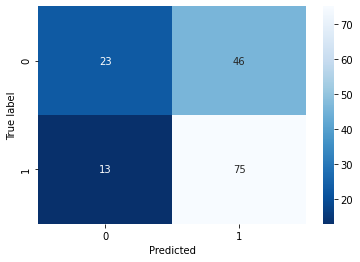

In [128]:
# постройте матрицу ошибок и сохраните её в переменную
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues_r')
plt.ylabel('True label')
plt.xlabel('Predicted'); 

In [129]:
# проводим оценку точности
acc = accuracy_score(y_test, y_pred)
print(f"accuracy = {acc:.3f}")
recall = recall_score(y_test, y_pred) 
print(f"recall = {recall:.3f}")
precision = precision_score(y_test, y_pred) 
print(f"precision = {precision:.3f}")


accuracy = 0.624
recall = 0.852
precision = 0.620


### 6.2 Анализ модели логистической регрессии

#### 6.2.1 Определяем критичную ошибку

Для заказчика важнее всего получить вкусное молоко, а это значит, что нам важно не купить корову, которая дает не вкусное молоко. А значит, критичнее ошибка первого рода (False Positive).
В данном случае важна метрика precision (точность). 

* Минимизация ошибки первого рода означает, что для нас неприемлемо покупать коров, которые не дадут вкусного молока. Каждая такая покупка - это прямой убыток.
* Precision (точность) показывает, насколько мы уверенно определяем коров с вкусным молоком. Высокий precision гарантирует, что если мы пометили корову как "вкусную", то с большой вероятностью она такой и является.

Recall (полнота) в данном случае отходит на второй план, так как нам важнее не купить "плохую" корову, чем найти всех "хороших". Да, мы можем пропустить некоторых коров с вкусным молоком (низкий recall), но зато будем уверены, что те, которых мы выбрали, с большой вероятностью соответствуют требованиям (высокий precision).

При покупке коров, где критична ошибка первого рода, в приоритете метрика precision (точность). Необходимо максимально снизить вероятность покупки коровы, которая не дает вкусное молоко, даже если это означает пропуск некоторых хороших коров.


#### 6.2.2. Сведем критичную ошибку к нулю

In [130]:
y_proba = clf.predict_proba(X_test)[:,1]
data = pd.DataFrame(zip(y_test, y_proba),
             columns = ['y_valid', 'y_proba']).sort_values(by='y_proba',ascending=False)

In [131]:
print(data.head())

     y_valid   y_proba
66         1  0.834593
85         1  0.833856
51         1  0.826908
110        1  0.823521
146        1  0.813690


In [132]:
# рссчитывает precision для заданного количества порогов классификации.

def calculate_precision_for_thresholds(y_true, y_proba, num_thresholds=1000):
    
    thresholds = np.linspace(0, 1, num_thresholds)
    precision_values = []

    for threshold in thresholds:
        y_pred = (y_proba >= threshold).astype(int)
        tp = ((y_true == 1) & (y_pred == 1)).sum()
        fp = ((y_true == 0) & (y_pred == 1)).sum()
        precision = tp / (tp + fp) if (tp + fp) != 0 else 0
        precision_values.append(precision)

    return pd.DataFrame({'threshold': thresholds, 'precision': precision_values})

In [133]:
precision_df = calculate_precision_for_thresholds(data['y_valid'], data['y_proba'], num_thresholds=1000)

In [134]:
print(precision_df)

     threshold  precision
0     0.000000    0.56051
1     0.001001    0.56051
2     0.002002    0.56051
3     0.003003    0.56051
4     0.004004    0.56051
..         ...        ...
995   0.995996    0.00000
996   0.996997    0.00000
997   0.997998    0.00000
998   0.998999    0.00000
999   1.000000    0.00000

[1000 rows x 2 columns]


In [135]:
# Находим индекс первой строки, где precision равен 1
first_index = precision_df['precision'].idxmax()

# Выводим строку по индексу
print(precision_df.iloc[[first_index]])

     threshold  precision
786   0.786787        1.0


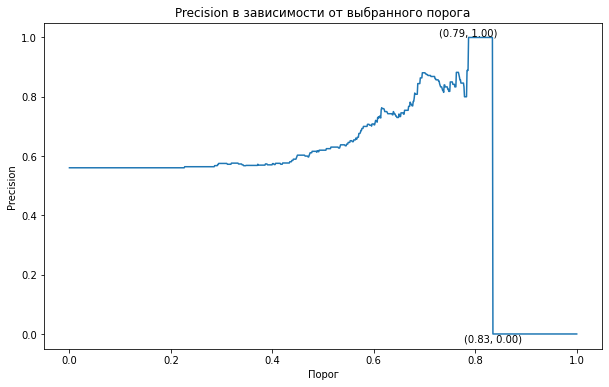

In [136]:
# извлекаем пороги и precision из DataFrame
thresholds = precision_df['threshold']
precision_values = precision_df['precision']

# создаем график
plt.figure(figsize=(10, 6)) # Устанавливаем размер графика (ширина=10, высота=6)
sns.lineplot(x=thresholds, y=precision_values)
plt.ylabel('Precision')
plt.xlabel('Порог')
plt.title('Precision в зависимости от выбранного порога')

# находим индексы точек экстремума
max_ind = precision_values.idxmax()
min_ind = precision_values.idxmin()

# добавляем подписи к точкам экстремума
plt.text(thresholds[max_ind], precision_values[max_ind], f'({thresholds[max_ind]:.2f}, {precision_values[max_ind]:.2f})', ha='center', va='bottom')
plt.text(thresholds[min_ind], precision_values[min_ind], f'({thresholds[min_ind]:.2f}, {precision_values[min_ind]:.2f})', ha='center', va='top')

plt.show()

In [137]:
#устанавливаем новый порог
new_threshold = 0.79

#применяем порог
y_pred = (y_proba >= new_threshold).astype(int)     

In [138]:
print(y_pred)

[0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 1
 0 0 0 0 0 0 0 0 0]


In [139]:
# пересчитываем precision
precision = precision_score(y_test, y_pred)

# пересчитываем recall
recall = recall_score(y_test, y_pred)

print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")

Precision: 1.00
Recall: 0.09


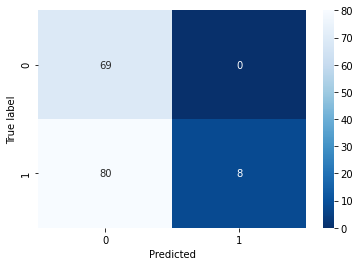

In [140]:
# постройте матрицу ошибок и сохраните её в переменную
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues_r')
plt.ylabel('True label')
plt.xlabel('Predicted'); 

Вывод:
мы можем сделать вывод, что при выбранном пороге 0,79 модель не допускает ошибок первого рода. При таком решении заказчик точно не закупит коров, которые дают не вкусное молоко.\
В то же время модель допускает большое количество ошибок второго рода - 80 коров модель спрогнозировала как с не вкусным молоком, а на самом деле они дают вкусное молоко.
Получается, правильное решение — закрывать глаза на упущенную выгоду и сосредоточиться на том, чтобы более качественно отсеивать коров с не вкусным молоком.

### 6.3 Прогноз вкуса молока коров, которых фермер хочет купить

С помощью обученной модели спрогнозируем вкус молока коров, которых фермер хочет купить. 

Выполните подготовку данных, аналогичную той, которую делали для тренировочной выборки.
Получите прогноз вкуса молока коров.

In [141]:
cow_buy_df.head(5)

,порода,тип_пастбища,порода_папы,имя_папы,жирность,белок,возраст,эке,протеин,спо,спо_bin,эке_квадрат
0,Айдиал,холмистое,Айдиал,Геркулес,3.58,3.076,более_2_лет,15.276162,2019.947532,0.958744,1,233.361138
1,Айдиал,равнинное,Соверин,Буйный,3.54,3.081,менее_2_лет,15.276162,2019.947532,0.958744,1,233.361138
2,Соверин,равнинное,Соверин,Барин,3.59,3.074,более_2_лет,15.276162,2019.947532,0.958744,1,233.361138
3,Соверин,холмистое,Айдиал,Буйный,3.40,3.061,более_2_лет,15.276162,2019.947532,0.958744,1,233.361138
4,Соверин,равнинное,Айдиал,Буйный,3.64,3.074,более_2_лет,15.276162,2019.947532,0.958744,1,233.361138


In [142]:
cow_buy_clf = cow_buy_df.copy()

## подготовка признаков (масштабирование и кодирование)
cow_buy_clf_ohe = encoder.transform(cow_buy_clf[cat_col])
    
encoder_col = encoder.get_feature_names_out()

cow_buy_clf_scaled = scaler.transform(cow_buy_clf[num_col])

cow_buy_clf_ohe = pd.DataFrame(cow_buy_clf_ohe, columns=encoder_col)
cow_buy_clf_scaled = pd.DataFrame(cow_buy_clf_scaled, columns=num_col)

cow_buy_clf = pd.concat([cow_buy_clf_ohe, cow_buy_clf_scaled], axis=1)

In [143]:
#делаем предсказания
clf_pred_buy = clf.predict(cow_buy_clf)

#добавляем предсказания в исходный DataFrame
cow_buy_clf['predicted_вкус'] = clf_pred_buy

print(cow_buy_clf)

    порода_Соверин  тип_пастбища_холмистое  порода_папы_Соверин  \
0              0.0                     1.0                  0.0   
1              0.0                     0.0                  1.0   
2              1.0                     0.0                  1.0   
3              1.0                     1.0                  0.0   
4              1.0                     0.0                  0.0   
5              1.0                     0.0                  1.0   
6              0.0                     1.0                  0.0   
7              0.0                     0.0                  1.0   
8              1.0                     0.0                  1.0   
9              1.0                     1.0                  0.0   
10             0.0                     1.0                  1.0   
11             1.0                     0.0                  1.0   
12             0.0                     1.0                  0.0   
13             0.0                     1.0                  1.

In [144]:
y_proba_buy = clf.predict_proba(cow_buy_clf.drop('predicted_вкус', axis=1))
print(y_proba_buy[:,1])

[0.704503   0.64434558 0.53891829 0.36250736 0.55521385 0.09638487
 0.704503   0.64161951 0.53891829 0.75169936 0.19517082 0.50703112
 0.09357057 0.62627246 0.53891829 0.46303142 0.74675219 0.09433405
 0.39665419 0.55521385]


In [145]:
y_pred_buy = (y_proba_buy[:, 1] >= 0.79).astype(int)  
print(y_pred_buy)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


## 7. Итоговый вывод

Мы получили запрос от фермера, который хочетотобрать коров для покупки. Фермер требует, чтобы каждая корова давала минимум 6000 кг молока в год и производила вкусное молоко по его строгим критериям. 

Перед нами стояла цель — с помощью модели отобрать коров по двум критериям:
- средний удой за год — не менее 6000 килограммов;
- молоко должно быть вкусным.

Мы получили три датасета:
- ferma_main.csv
- ferma_dad.csv
- cow_buy.csv

Результаты проведенной работы:

**1. Загрузка данных**

- Исходный датафрейм **ferma_main_df** содержит 634 строки и 12 столбцов. Пропусков нет. Не корректный тип данных в столбцах: ЭКЕ, СПО, Жирность, Белок.
- Исходный датафрейм **ferma_dad_df** содержит 629 строк и 2 колонки. Пропусков нет. Тип данных в столбцах корректный.
- Исходный датафрейм **cow_buy_df** содержит 20 строки и 7 колонок. Пропусков в столбцах нет. Не корректный тип данных в столбцах: Текущая_жирность, Текущий_уровень_белок.

**2. На этапе предобработки данных мы:**
- Привели названия столбцов в соответсвие с правилами хорошего стиля.
- Обработали пропуски и дубликаты:
    - в исходных датафреймах пропусков не обнаружено,
    - в датафрейме ferma_main_df обнаружено 5 строк-дубликатов, которые составляю 0.79% всех данных. Дублирующиеся строки удалили, так как они совпадают по уникальному идентификатору,
    - в датафрейме cow_buy_df обнаружены 4 строки-дубликата, которые составляют 20% всех данных. Объекты не имеют уникальных идентификаторов. Мы предположили, что есть коровы, у которых совпали все признаки, поэтому удалять дубликаты не стали,
    - в датафрейме ferma_dad_df строк-дубликатов не обнаружено,
    - проверили уникальные значения для категориальных признаков каждого датафрейма и устранили неявные дубликаты,
    - установили корректные типы данных в исходных датафреймах:
    - в датафрейме ferma_main_df в столбцах ЭКЕ, СПО, Жирность, Белок был тип данных - object, заменили на float,
    - в датафрейме cow_buy_df в столцах текущая_жирность, текущий_уровень_белок был тип данных - object, заменили на float

**3. Исследовательский анализ данных показал:**

- наблюдается бимодальность в данных, в связи с этим далее мы проведем анализ в подгруппах.
- есть экстремально высокое значение по удою, которое мы удалили. Остальные точки на "ящиках с усами" - можно считать приемлимыми значениями на данном этапе. 
- признаки СПО и Жирность имеют большую ассиметрия - скорее всего они имеют две-три группы. Мы проверим, стоит ли их перевести в категориальную шкалу.

**4. Корреляционный анализ:**
- Целевой признак "удой(кг)":
    - линейная связь наблюдается между целевым признаком и входными признаками: сырой протеин(г);
    - нелинейная связь наблюдается между целевым признаком и входными признаками: ЭКЕ, СПО, жирность(%), белок(%);
    - сильная корреляция наблюдается между целевым признаком и входными признаками: ЭКЕ, СПО, возраст;
    - умеренная корреляция наблюдается между целевым признаком и взодными признаками: сырой протеин(г), порода папы;
    - слабая корреляция наблюдается между целевым признаком и входными признаками: жирность(%), белок(%), порода, тип пастбища.
    - между признаками встречаются нелинейные связи. Причиной этого может быть разный масштаб признаков. Можно провести масштабирование или трансформирование признаков.
    - мультиколлинеарность между входными признаками не наблюдается
    
**5. Обучение модели линейной регрессии**

- Мы обучили три модели линейной регресии и сравнили их качество:
    - Самый высокий коэффициент детерминации R2 LinearRegression наблюдается у третьей модели - он составил 0.825, что выше чем у второй модели (0,82) и первой (0.784). Третья модель делает проноз точнее, чем первая и вторая, но по прежнему ошибается. В 82,5% случаев предсказание третьей модели точнее, чем среднее значение целевого признака.
    - В результате оценки качества каждой модели по метрикам MSE, MAE, RMSE видно, что модель 3 демонстрирует наилучшие показатели по все:

* MSE: 35673.890 - наименьшее значение среди всех моделей.
* MAE: 146.163 - также наименьшее значение.
* RMSE: 188.875 - опять же, наименьшее значение.

Чем меньше значения этих метрик, тем лучше модель предсказывает целевую переменную. 
Основываясь на полученных метриках, модель 3 является лучшей из трех. 
С помощью третьей модели мы получили пргонзные значения удоя для коров, которых собирается купить фермер.

**6. Обучение модели логистической регрессии**
- В результате решения задачи бинарной классификации мы создали и обучили модель логистичской регрессии. 
- Мы оценили качество модели на тестовой выборке: рассчитали метрики accuracy, recall, precision. 
- Проанализировав модель логистической регрессии мы установили, что при покупке коров для получения вкусного молока критична ошибка ложноположительного результата (False Positive) - покупка коровы, которая даёт невкусное молоко. Это прямой убыток для заказчика. Поэтому важна метрика precision (точность), которая показывает, насколько мы уверены в том, что корова с прогнозом "вкусное молоко" действительно его даёт. Высокий precision гарантирует минимизацию ошибочных покупок, пусть даже ценой пропуска некоторых хороших коров (ниже recall).
- Чтобы сведисти критичную ошибку к нулю мы изменили порог принадлежности к классам до 0,79 модель. При таком значении порога модель не допускает ошибок первого рода, а метрика precision стала равна 1. При таком решении заказчик точно не закупит коров, которые дают не вкусное молоко. В то же время модель допускает большое количество ошибок второго рода - 80 коров модель спрогнозировала как с не вкусным молоком, а на самом деле они дают вкусное молоко.
- С помощью обученной модели мы спрогнозировали вкус молока коров, которых фермер хочет купить. В результате мы не получили ни одной коровы с вкусным молоком. 

**Итоговый вывод:**

Исходя из запроса фермера мы можем сказать, что среди 20 коров, которых он рассматривает к закупке, нет ни одной коровы, которая удовлетворяет его запросу:
- средний удой за год — не менее 6000 килограммов;
- молоко должно быть вкусным.

**Рекомендации:**
Можем порекомендовать фермеру пересмотреть критерии запроса либо рассмотреть других коров к закупке.